# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install scikit-learn==1.2.2

#!pip install numpy==1.25.2 #pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
#!#pip install package-name --no-warn-script-location
#!pip install --upgrade scikit-learn
#!pip install pandas==2.1.4
#!pip install seaborn==0.13.0
#!pip install matplotlib==3.7.1
#!pip install numpy==1.25.2
#!pip install scikit-learn==1.2.2
#!pip install sklearn-pandas==2.2.0
#!pip install imbalanced-learn==0.10.1
#!pip install xgboost==2.0.3 -q --user


 #seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [3]:
# Import
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier



# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Read_data=pd.read_csv("/content/sample_data/BankChurners.csv")

# Data Overview

- Observations
- Sanity checks

##View the first and last 5 rows of the dataset.

In [6]:
#View top 5 rows of the data
Read_data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [7]:
#View bottom 5 rows of the data
Read_data.tail(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


## Understand the shape of the dataset.

In [8]:
# checking the shape of the data
Read_data.shape

print("There are ",Read_data.shape[0],"rows and",Read_data.shape[1],"columns")

There are  10127 rows and 21 columns


##Check the data types of the columns for the dataset

In [9]:
#Understanding the Dataset
Read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Observations:

There are 20 Data Attributes.
There are 5 Float Dataype column, all other columns seems to have integer which is numeric  datatypes. Except Education level  and Marital Status, all the columns have 10127 observations.

There are 6 Categorical variables -

  1) Attrition_Flag:

  2) Gender:

  3) Education_Level:

  4) Marital_Status:

  5) Income_Category:
  
  6) Card_Category:



  


There are 7 Numeric variables -

1) CLIENTNUM

2) Customer_Age

3) Dependent_count

4)Total_Relationship_Count

5) Months_on_book

6) Credit_Limit

7) Total_Revolving_Bal

8) Months_Inactive_12_mon

9) Contacts_Count_12_mon

10) Avg_Open_To_Buy

 11) Total_Amt_Chng_Q4_Q1

 12)Total_Trans_Amt   

 13) Total_Trans_Ct  

 14)  Total_Ct_Chng_Q4_Q1   
    
 15)Avg_Utilization_Ratio




Checking for duplicate entries in the data

In [10]:
Read_data.duplicated().sum()

0

Data does not have duplicate records

In [11]:
#pip install ydata-profiling


In [12]:
#from ydata_profiling import ProfileReport

# Load your dataset
#df = pd.read_csv("/content/sample_data/BankChurners.csv")

# Generate the profiling report
#profile = ProfileReport(df, title="Your Dataset Profiling Report")

# Display the report in a Jupyter notebook (if using one)
#profile.to_notebook_iframe()

# Save the report to an HTML file
#profile.to_file("BankChurnersreport.html")

# #Checking the Statistical Summary

In [13]:
Read_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


In [14]:
Read_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


Sure, let's break down the insights from the provided summary statistics:

1. **CLIENTNUM**: This seems to be an identifier for each customer. The values range from approximately 708 million to 828 million, indicating a large customer base.

2. **Customer_Age**: The average age of customers is about 46.3 years, with a standard deviation of 8 years. The ages range from 26 to 73 years, showing a diverse age group.

3. **Dependent_count**: On average, customers have about 2.35 dependents, with a standard deviation of 1.3. The number of dependents ranges from 0 to 5.

4. **Months_on_book**: Customers have been with the company for an average of about 35.9 months (approximately 3 years), with a standard deviation of 8 months. The range is from 13 to 56 months.

5. **Total_Relationship_Count**: This metric, which likely indicates the number of products or services a customer uses, averages around 3.81, with a standard deviation of 1.55. The range is from 1 to 6.

6. **Months_Inactive_12_mon**: On average, customers have been inactive for about 2.34 months in the past year, with a standard deviation of 1 month. The range is from 0 to 6 months.

7. **Contacts_Count_12_mon**: Customers have contacted the company about 2.46 times on average in the past year, with a standard deviation of 1.1. The range is from 0 to 6 contacts.

8. **Credit_Limit**: The average credit limit is approximately 8,632 USD, with a standard deviation of $9,089. The range is from 1,438.3 USD to 34,516 USD.

9. **Total_Revolving_Bal**: The average revolving balance is about 1,163 USD, with a standard deviation of $815. The range is from 0 USD to 2,517 USD.

10. **Avg_Open_To_Buy**: This represents the average amount available to spend, which is about 7,469 USD, with a standard deviation of 9,091 USD. The range is from 3 USD to 34,516 USD.

11. **Total_Amt_Chng_Q4_Q1**: This metric, likely indicating the change in transaction amount from Q4 to Q1, averages around 0.76, with a standard deviation of 0.22. The range is from 0 to 3.397.

12. **Total_Trans_Amt**: The average transaction amount is about 4,404 USD, with a standard deviation of 3,397 USD. The range is from 510 USD to 18,484 USD.

13. **Total_Trans_Ct**: The average number of transactions is about 64.86, with a standard deviation of 23.47. The range is from 10 to 139 transactions.

14. **Total_Ct_Chng_Q4_Q1**: This metric, likely indicating the change in transaction count from Q4 to Q1, averages around 0.71, with a standard deviation of 0.24. The range is from 0 to 3.714.

15. **Avg_Utilization_Ratio**: The average utilization ratio is about 0.275, with a standard deviation of 0.276. The range is from 0 to 0.999.

These insights can help in understanding customer behavior, credit usage, and engagement with the company.

In [15]:
data = Read_data.copy() # making a copy of the data
print(data)

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

In [16]:
# Dropping columns
data.drop(['CLIENTNUM'], axis=1, inplace=True)


# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
     # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        #hue="Attrition_Flag",
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [20]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

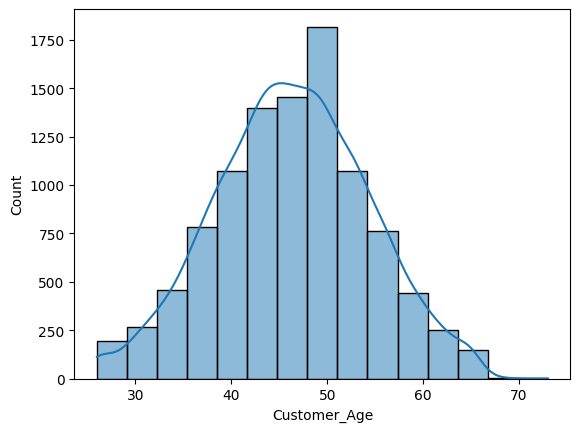

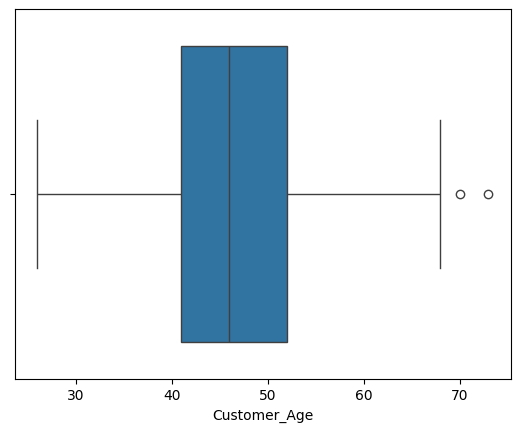

In [21]:

sns.histplot(data=data, x='Customer_Age',bins=15, kde = True)
plt.show()
sns.boxplot(data=data,x='Customer_Age')
plt.show()


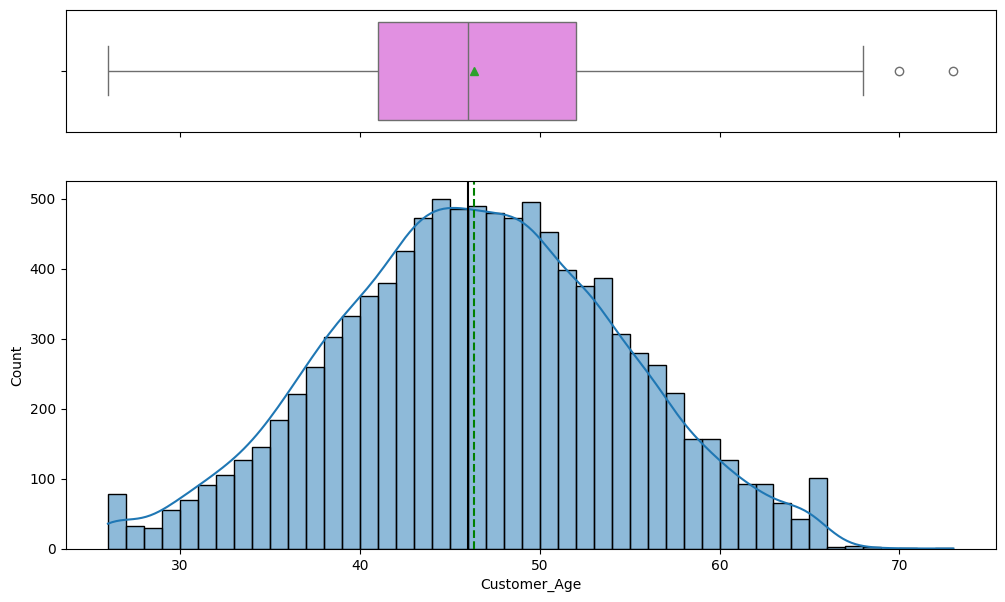

In [22]:

histogram_boxplot(data, "Customer_Age", kde=True)

Customer_Age: is Normally distributed

Median is above 45

Very few Outliers found

Customer_Age: The average age of customers is about 46.3 years, with a standard deviation of 8 years. The ages range from 26 to 73 years, showing a diverse age group.

`Months_on_book`

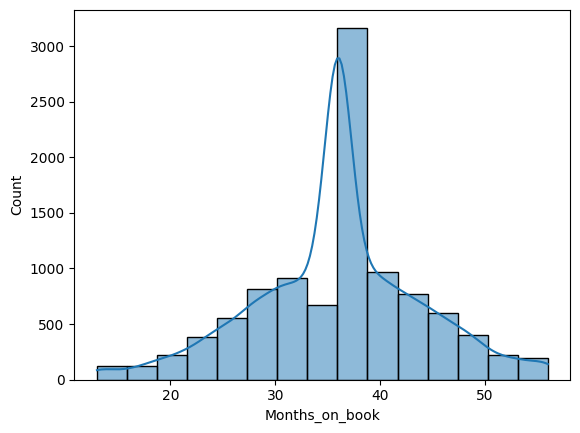

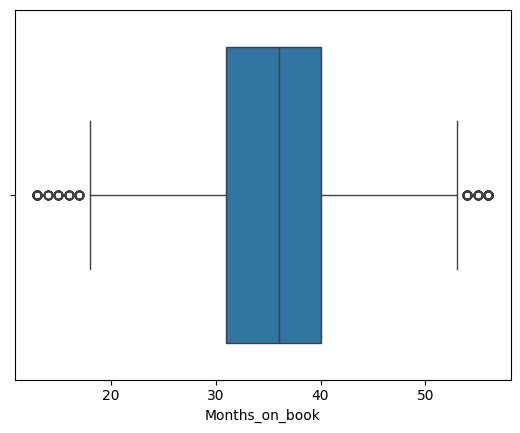

In [23]:
sns.histplot(data=data, x='Months_on_book',bins=15, kde = True)
plt.show()
sns.boxplot(data=data,x='Months_on_book')
plt.show()

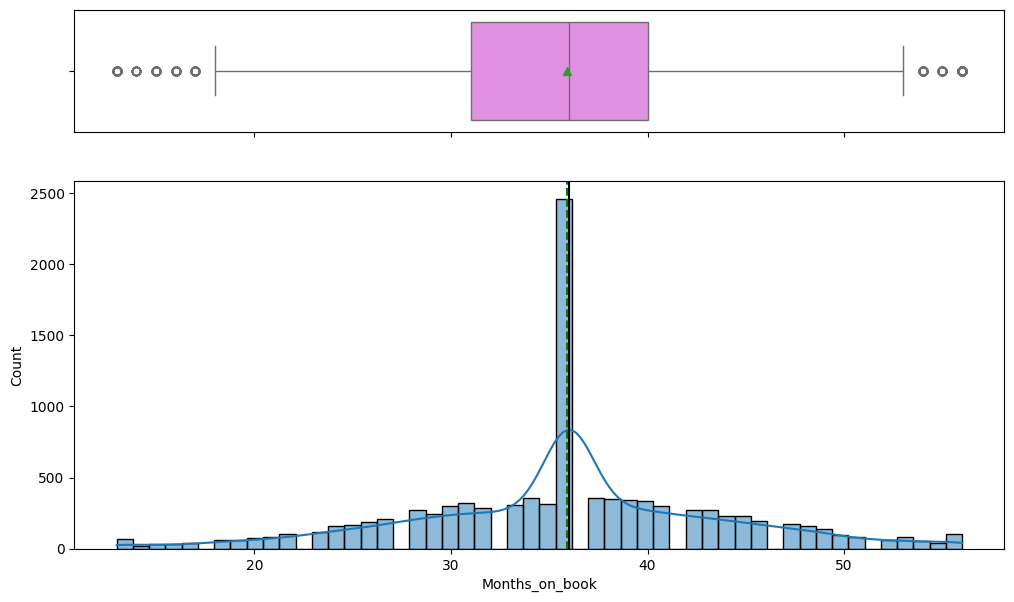

In [24]:
histogram_boxplot(data, "Months_on_book", kde=True)

Months_on_book: Customers have been with the company for an average of about 35.9 months (approximately 3 years), with a standard deviation of 8 months. The range is from 13 to 56 months.

Months on Book  is Normally distributed

Median is almost 36

Few Outliers found on both ends of the spectrum

`Credit_Limit`

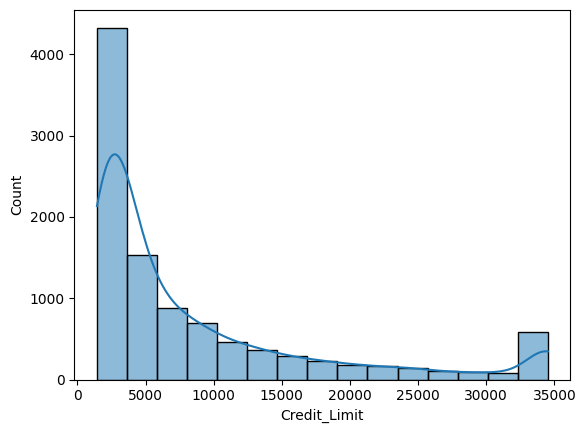

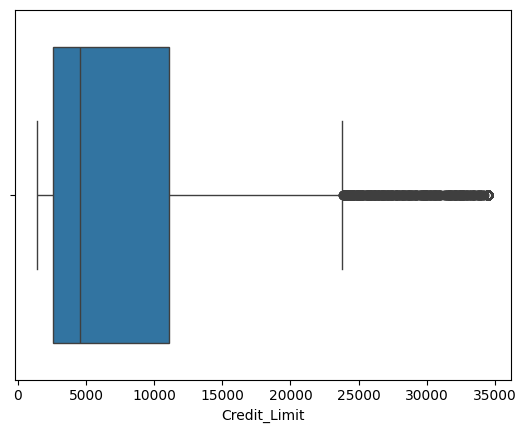

In [25]:
sns.histplot(data=data, x='Credit_Limit',bins=15, kde = True)
plt.show()
sns.boxplot(data=data,x='Credit_Limit')
plt.show()

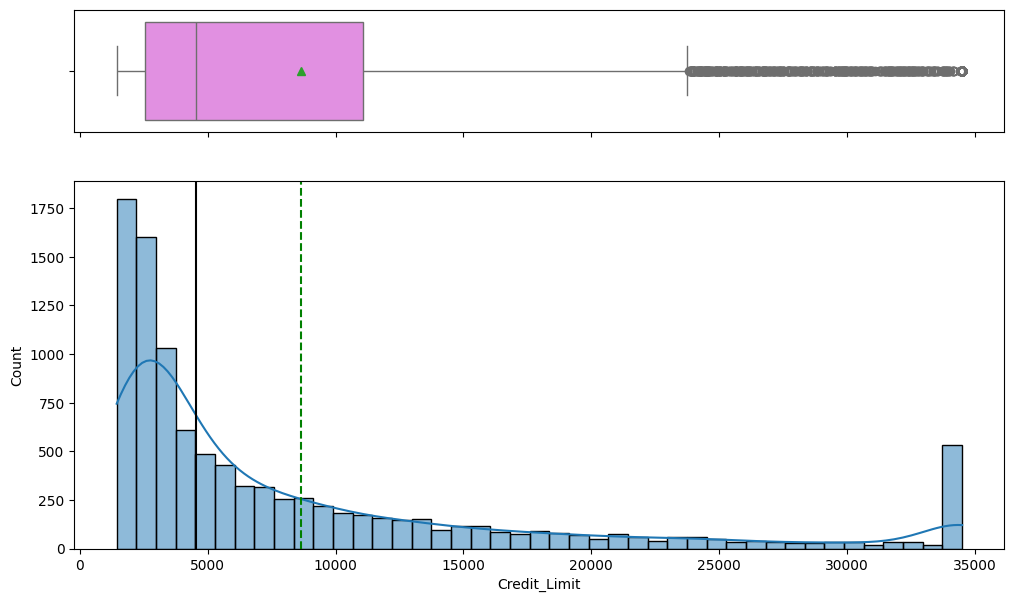

In [26]:
histogram_boxplot(data, "Credit_Limit", kde=True)

Credit Limit is right skewed

Median is closer to 5000

Many Outlier between 10000 to 35000

Credit_Limit: The average credit limit is approximately 8,632 USD, with a standard deviation of $9,089. The range is from 1,438.3 USD to 34,516 USD.

`Total_Revolving_Bal`

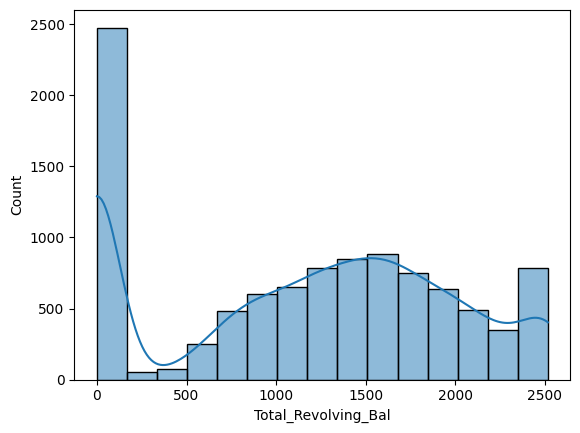

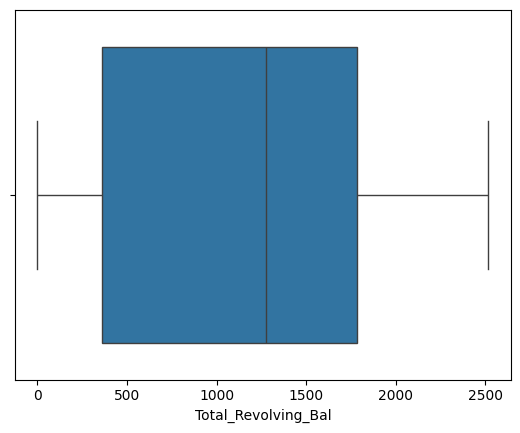

In [27]:
sns.histplot(data=data, x='Total_Revolving_Bal',bins=15, kde = True)
plt.show()
sns.boxplot(data=data,x='Total_Revolving_Bal')
plt.show()

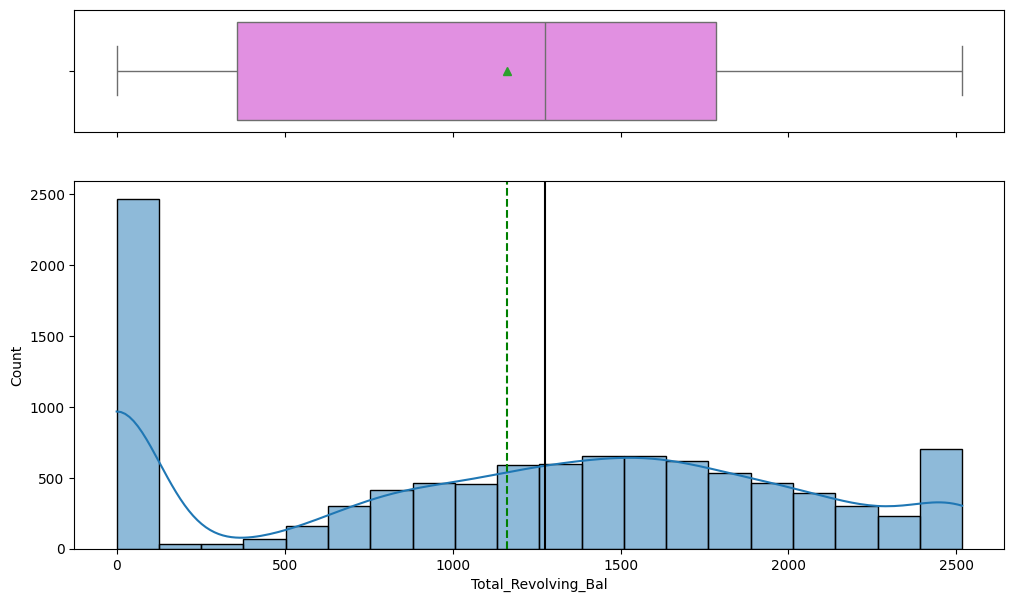

In [28]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)

Total Revolving balance is somewhat right skewed

Median is around 1300

No outliers found

Total_Revolving_Bal: The average revolving balance is about 1,163 USD, with a standard deviation of $815. The range is from 0 USD to 2,517 USD.


`Avg_Open_To_Buy`

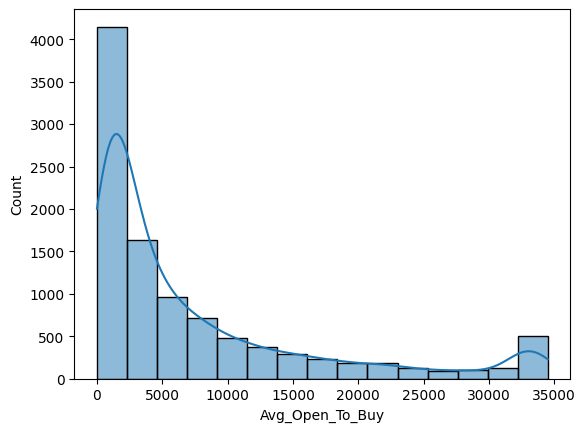

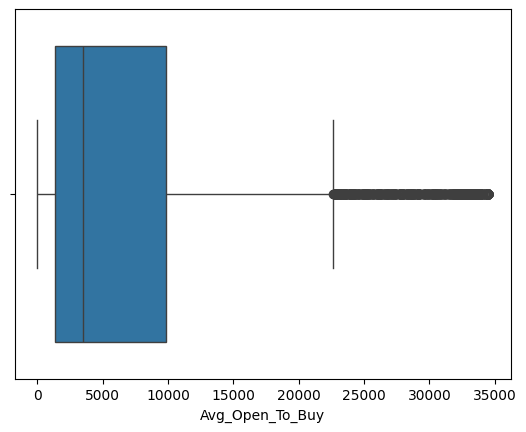

In [29]:
sns.histplot(data=data, x='Avg_Open_To_Buy',bins=15, kde = True)
plt.show()
sns.boxplot(data=data,x='Avg_Open_To_Buy')
plt.show()

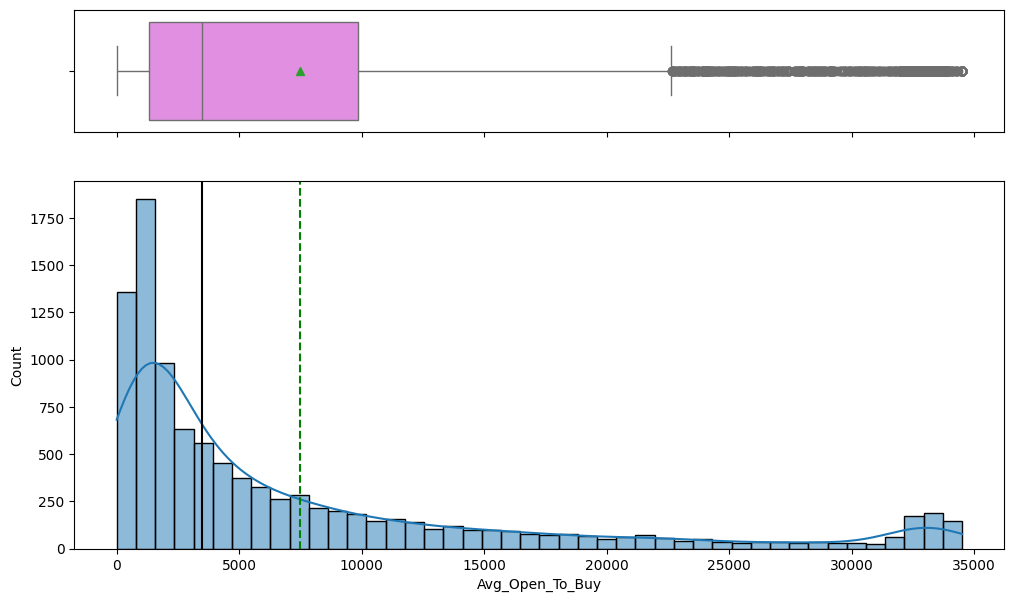

In [30]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)

Avg_Open_To_Buy is right skewed

Median is closer to 5000

Too many Outliers . WIll not be treated as they are true data values

Avg_Open_To_Buy: This represents the average amount available to spend, which is about 7,469 USD, with a standard deviation of 9,091 USD. The range is from 3 USD to 34,516 USD.



`Total_Trans_Ct`

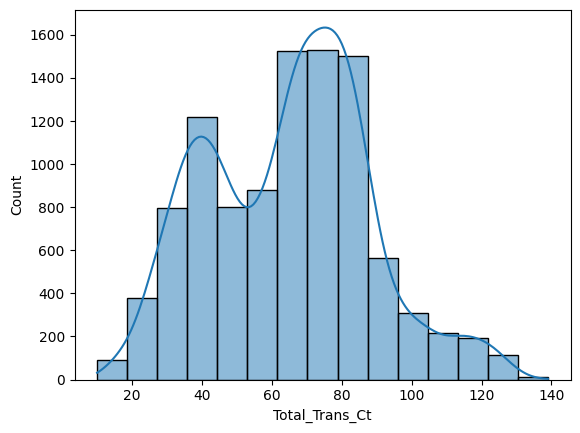

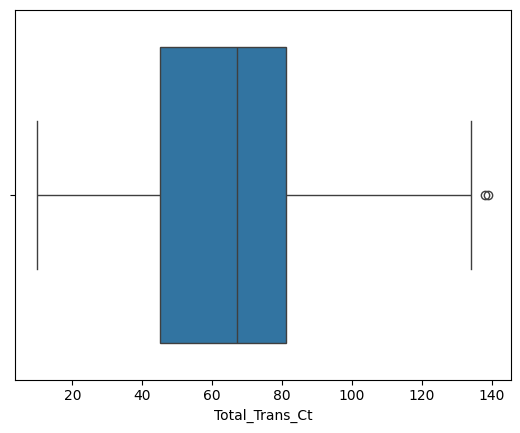

In [31]:
sns.histplot(data=data, x='Total_Trans_Ct',bins=15, kde = True)
plt.show()
sns.boxplot(data=data,x='Total_Trans_Ct')
plt.show()

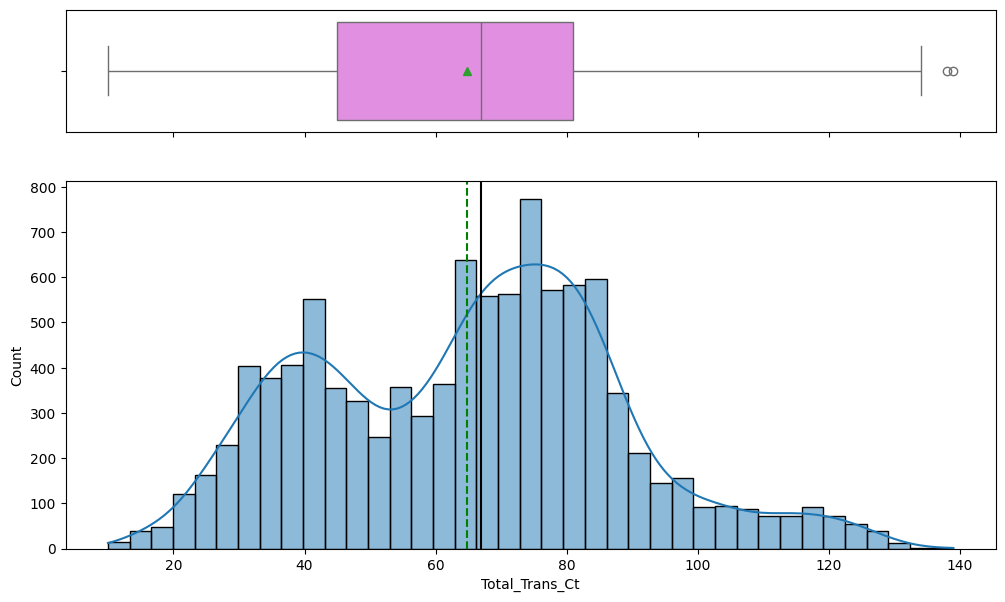

In [32]:
histogram_boxplot(data,"Total_Trans_Ct", kde=True)



Total Transaction count is Normally distributed
Median is closer to 70

There are a few outliers

Total_Trans_Ct: The average number of transactions is about 64.86, with a standard deviation of 23.47. The range is from 10 to 139 transactions.






`Total_Amt_Chng_Q4_Q1`

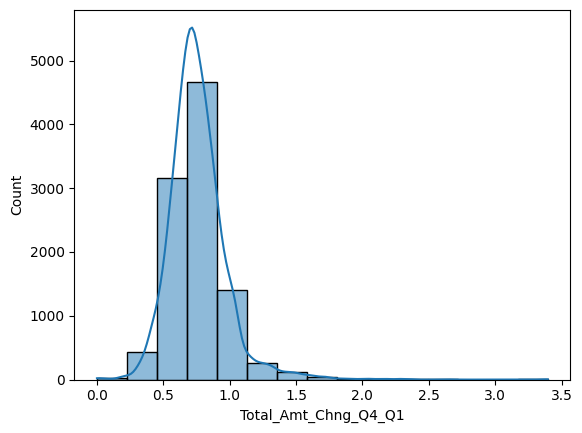

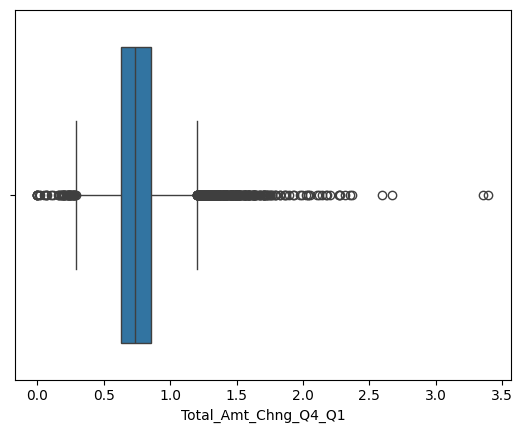

In [33]:
sns.histplot(data=data, x='Total_Amt_Chng_Q4_Q1',bins=15, kde = True)
plt.show()
sns.boxplot(data=data,x='Total_Amt_Chng_Q4_Q1')
plt.show()

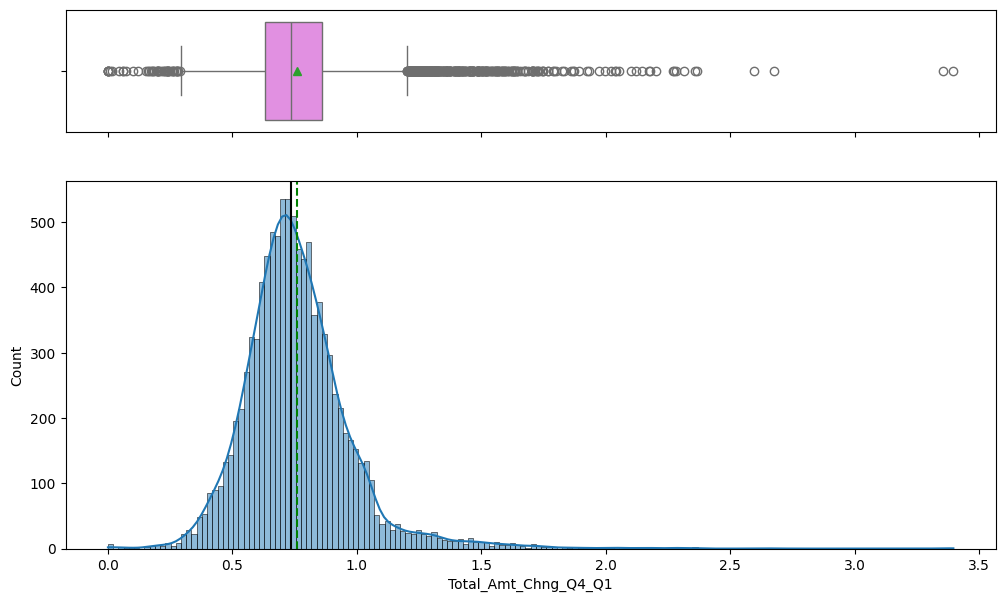

In [34]:
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1', kde=True)

Total_Amt_Chng_Q4_Q1: is right skewed

Median is between 0.5 and 1

Too many outliers

Total_Amt_Chng_Q4_Q1: This metric is indicating the change in transaction amount from Q4 to Q1, averages around 0.76, with a standard deviation of 0.22. The range is from 0 to 3.397.

`Total_Trans_Amt`

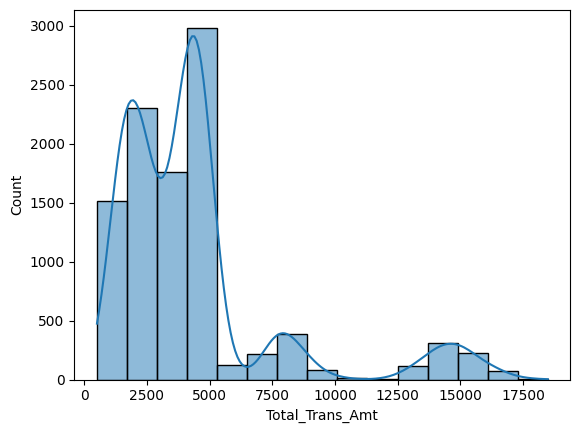

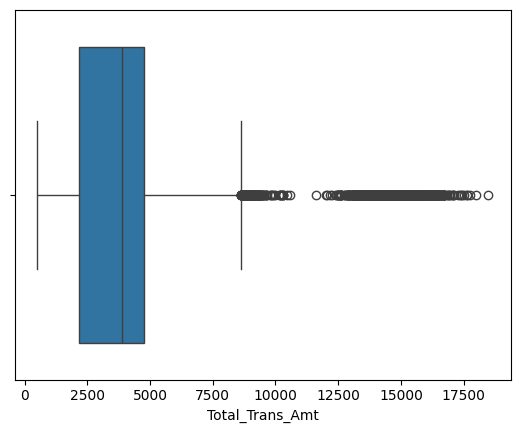

In [35]:
sns.histplot(data=data, x='Total_Trans_Amt',bins=15, kde = True)
plt.show()
sns.boxplot(data=data,x='Total_Trans_Amt')
plt.show()

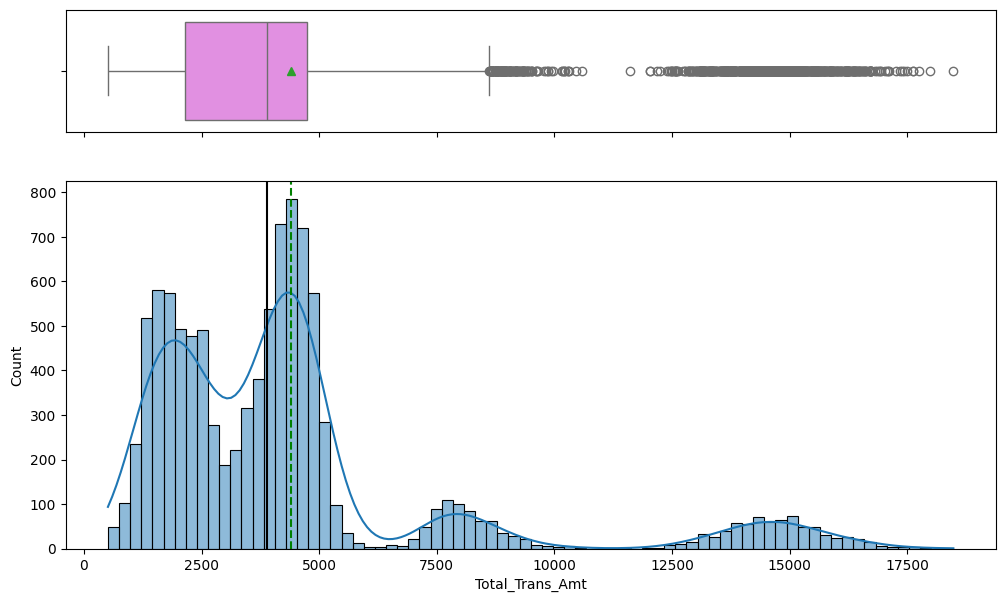

In [36]:
histogram_boxplot(data, 'Total_Trans_Amt', kde=True)

Q1) How is the total transaction amount distributed?

Total Transaction amount is right skewed
Median is closer to 5000

Too many outliers

Total_Trans_Amt: The average transaction amount is about 4,404 USD, with a standard deviation of 3,397 USD. The range is from 510 USD to 18,484 USD.

`Total_Ct_Chng_Q4_Q1`

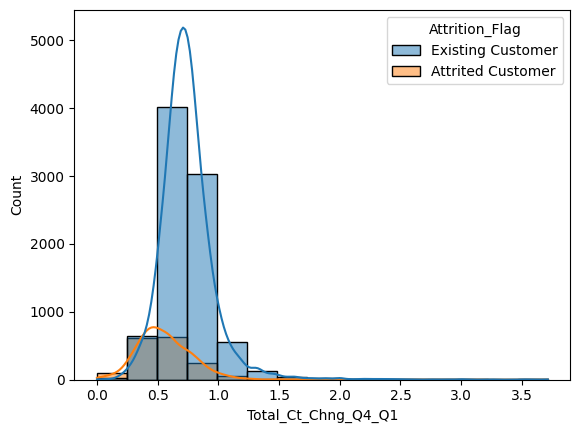

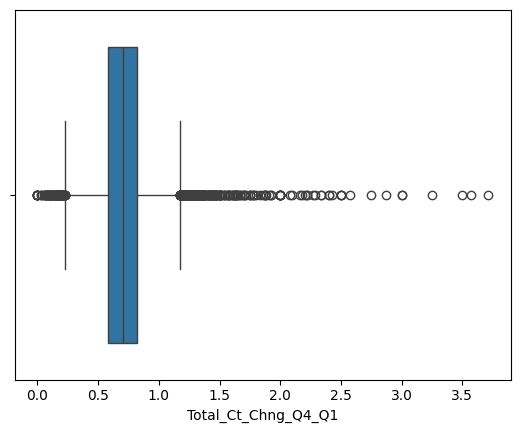

In [37]:
sns.histplot(data=data, x='Total_Ct_Chng_Q4_Q1',bins=15, kde = True,hue='Attrition_Flag')
plt.show()
sns.boxplot(data=data,x='Total_Ct_Chng_Q4_Q1')
plt.show()

In [38]:
descriptive_stats = data.groupby('Attrition_Flag')['Total_Ct_Chng_Q4_Q1'].describe()

print(descriptive_stats)

                     count  mean   std   min   25%   50%   75%   max
Attrition_Flag                                                      
Attrited Customer 1627.000 0.554 0.227 0.000 0.400 0.531 0.692 2.500
Existing Customer 8500.000 0.742 0.228 0.028 0.617 0.721 0.833 3.714


Q4) How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

**Attrited Customer:**
Count: 1627 customers.

Mean: The average change in transaction count is 0.554.

Std: The standard deviation is 0.227, indicating moderate variability.

Min: The minimum change is 0.

25%: 25% of the customers have a change of 0.400 or less.

50% (Median): The median change is 0.531.

75%: 75% of the customers have a change of 0.692 or less.

Max: The maximum change is 2.500.


**Existing Customer:**
Count: 8500 customers.

Mean: The average change in transaction count is 0.742.

Std: The standard deviation is 0.228, indicating moderate variability.

Min: The minimum change is 0.028.

25%: 25% of the customers have a change of 0.617 or less.

50% (Median): The median change is 0.721.

75%: 75% of the customers have a change of 0.833 or less.

Max: The maximum change is 3.714.

**Summary:**
Existing Customers tend to have a higher average change in transaction count between Q4 and Q1 compared to Attrited Customers.
The variability (standard deviation) is similar for both groups.
The range of changes (from min to max) is wider for Existing Customers, indicating more variability in their transaction count changes.

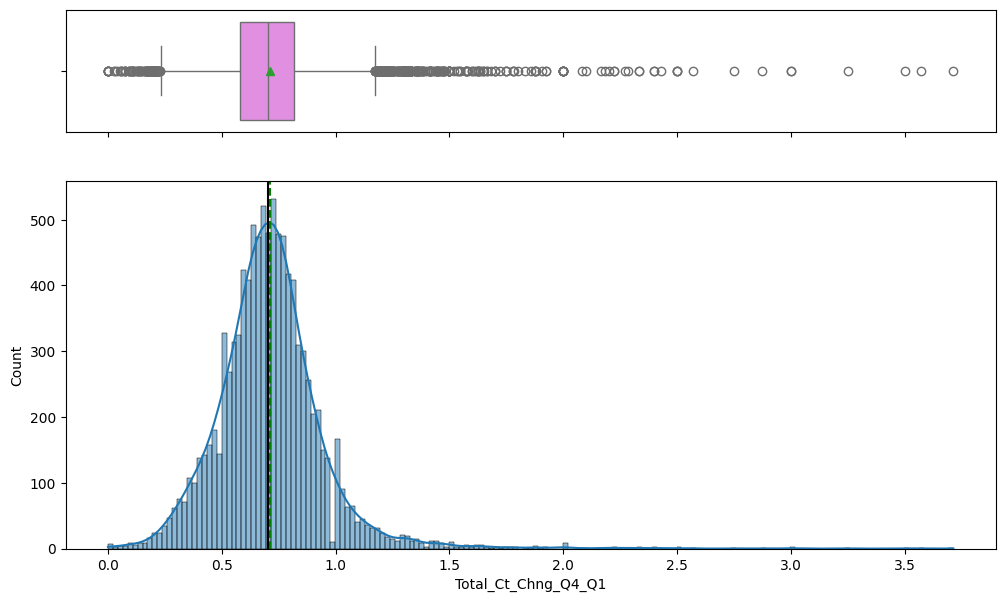

In [39]:
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1', kde=True)

Total_Ct_Chng_Q4_Q1 is Rigth Skewed
Median is between 0.5 and 1
Too many outliers

Total_Ct_Chng_Q4_Q1: This metric, likely indicating the change in transaction count from Q4 to Q1, averages around 0.71, with a standard deviation of 0.24. The range is from 0 to 3.714.


`Avg_Utilization_Ratio`

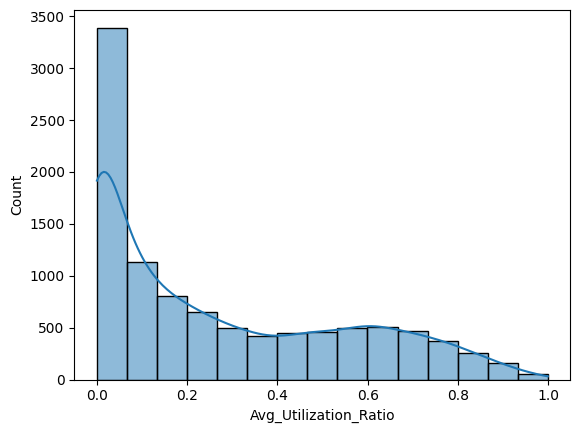

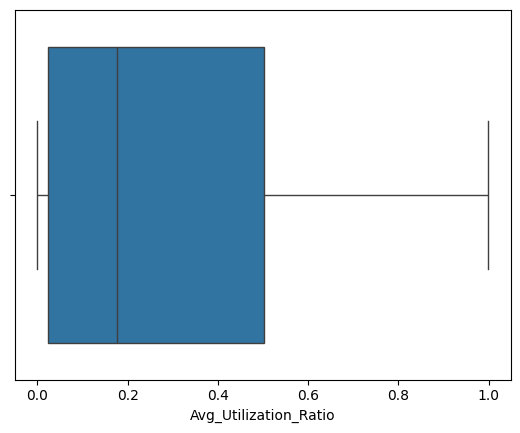

In [40]:
sns.histplot(data=data, x='Avg_Utilization_Ratio',bins=15, kde = True)
plt.show()
sns.boxplot(data=data,x='Avg_Utilization_Ratio')
plt.show()

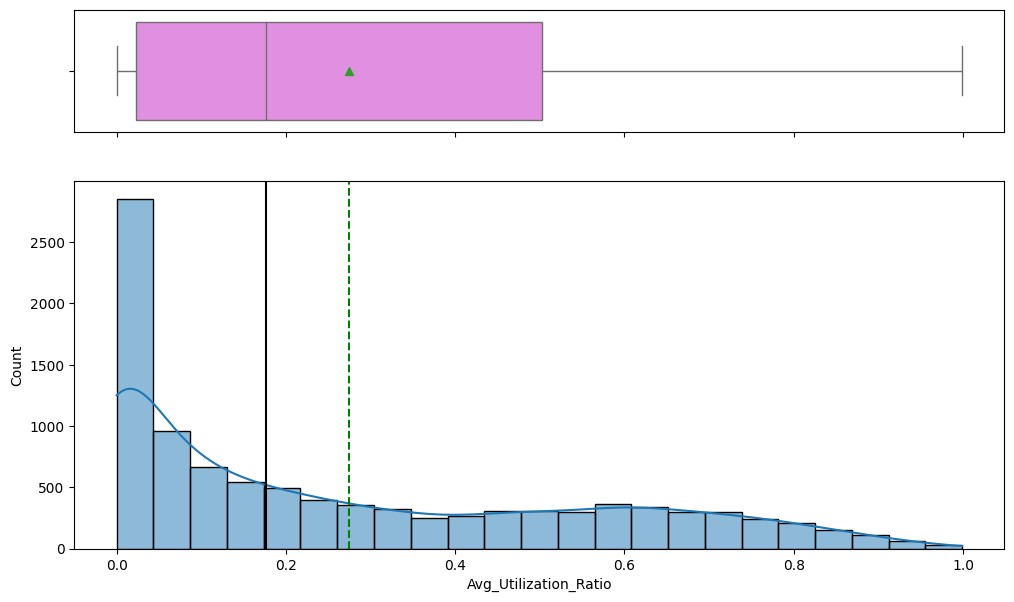

In [41]:
histogram_boxplot(data, 'Avg_Utilization_Ratio', kde=True)



Avg_Utilization_Ratio is right skewed

Median is around 0.2

No outliers found

Avg_Utilization_Ratio: The average utilization ratio is about 0.275, with a standard deviation of 0.276. The range is from 0 to 0.999.

`Dependent_count`

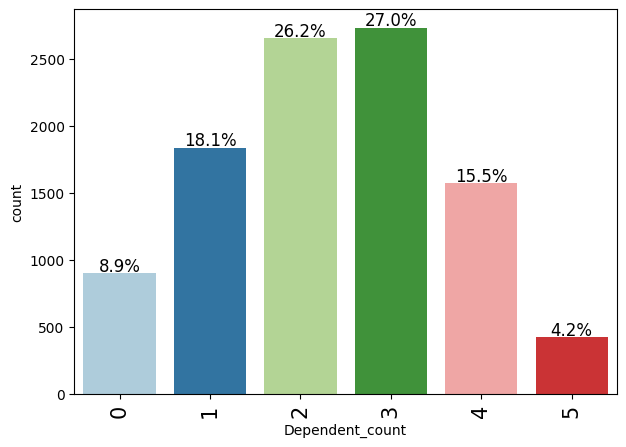

In [42]:
labeled_barplot(data, "Dependent_count",perc=True)

`Total_Relationship_Count`

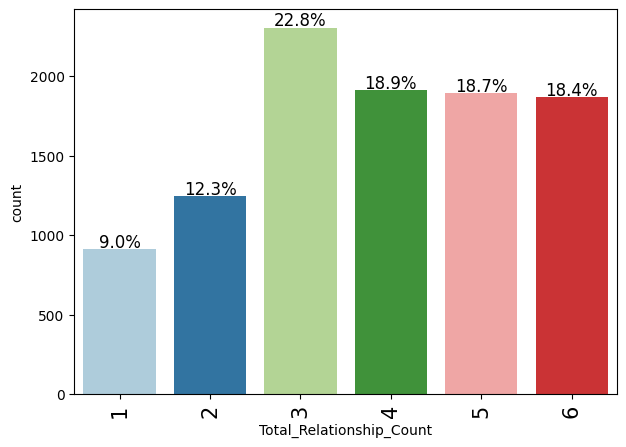

In [43]:
labeled_barplot(data,'Total_Relationship_Count',perc=True)

`Months_Inactive_12_mon`

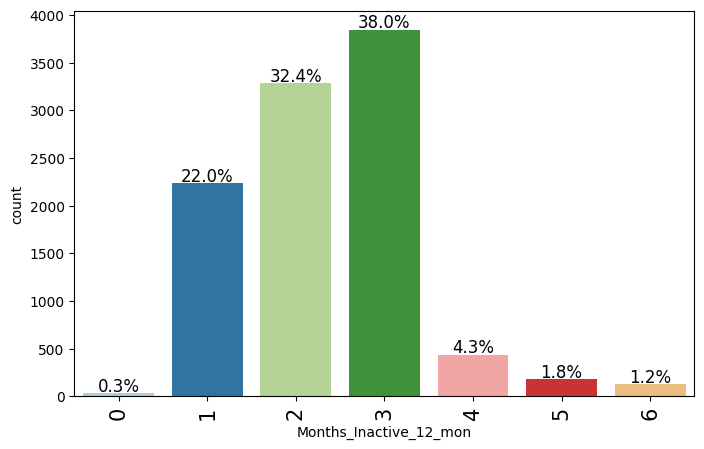

In [44]:
labeled_barplot(data,'Months_Inactive_12_mon',perc=True)

In [45]:
descriptive_stats1 = data.groupby('Attrition_Flag')['Months_Inactive_12_mon'].describe()

print(descriptive_stats1)

                     count  mean   std   min   25%   50%   75%   max
Attrition_Flag                                                      
Attrited Customer 1627.000 2.693 0.900 0.000 2.000 3.000 3.000 6.000
Existing Customer 8500.000 2.274 1.017 0.000 1.000 2.000 3.000 6.000


Q5) How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?
**Attrited Customer:**
Count: 1627 customers.

Mean: The average change in transaction count is 2.693.

Std: The standard deviation is 0.900, indicating moderate variability.

Min: The minimum change is 0.

25%: 25% of the customers have a change of 2.000 or less.

50% (Median): The median change is 3.000.

75%: 75% of the customers have a change of 3.000 or less.

Max: The maximum change is 6.


Existing Customer:
Count: 8500 customers.

Mean: The average change in transaction count is 2.274.

Std: The standard deviation is 1.017, indicating moderate variability.

Min: The minimum change is 0.

25%: 25% of the customers have a change of 1.000 or less.

50% (Median): The median change is 2.

75%: 75% of the customers have a change of 3.000 or less.

Max: The maximum change is 6.


**Summary:**
Attrited Customers tend to have a higher average change in transaction count between Q4 and Q1 compared to Existing Customers.
The variability (standard deviation) is slightly higher for Existing Customers.
The range of changes (from min to max) is the same for both groups, indicating that both groups have similar extremes in their transaction count changes

`Contacts_Count_12_mon`

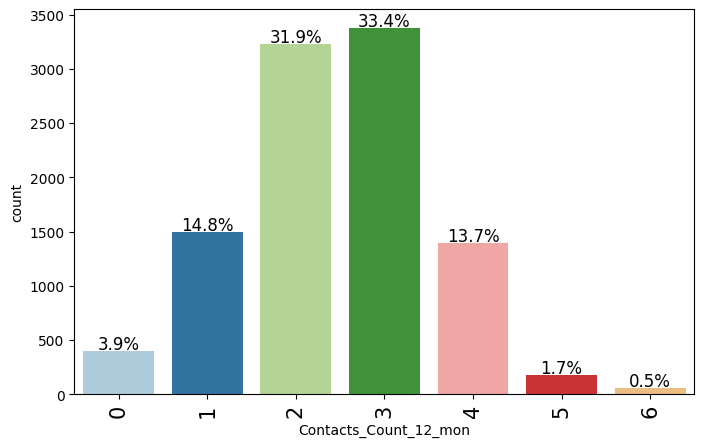

In [46]:
labeled_barplot(data, 'Contacts_Count_12_mon',perc=True)

`Gender`

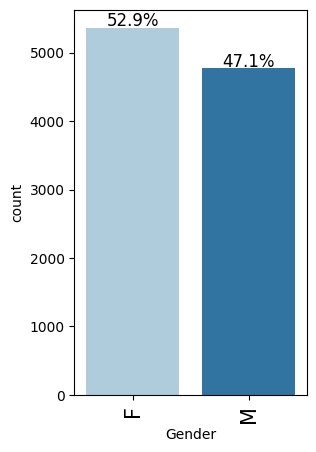

In [47]:
labeled_barplot(data,'Gender',perc=True)

**Let's see the distribution of the level of education of customers**

`Education_Level`

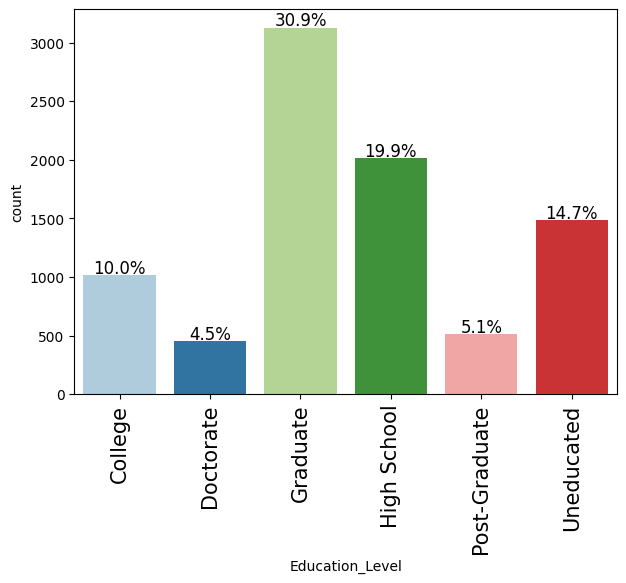

In [48]:
labeled_barplot(data,'Education_Level',perc=True)

Q2) What is the distribution of the level of education of customers?

Is Normally distribution

There are few outliers. Highest percentage 30.9% of customers are Graduates. Smaller percentage 4.5% are Doctorate


`Marital_Status`

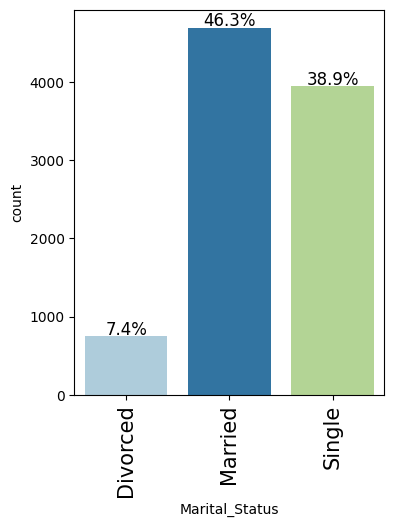

In [49]:
labeled_barplot(data,'Marital_Status', perc=True)

**Let's see the distribution of the level of income of customers**

`Income_Category`

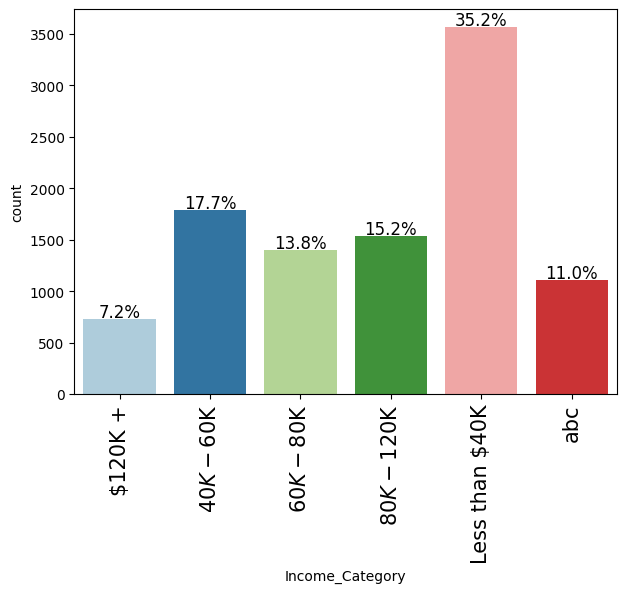

In [50]:
labeled_barplot(data,'Income_Category',perc=True)

Q3) What is the distribution of the level of income of customers?

35 percent of customers has a income lesser than 40K USD

There are bad values stored for income . This will need treatment. As Anamalous values are  11% . We can choose to drop those records or choose imputation by mode as these are categorical . We will need to consult Business stakeholders in a real world scenario, alternately ask for better data collection .

`Card_Category`

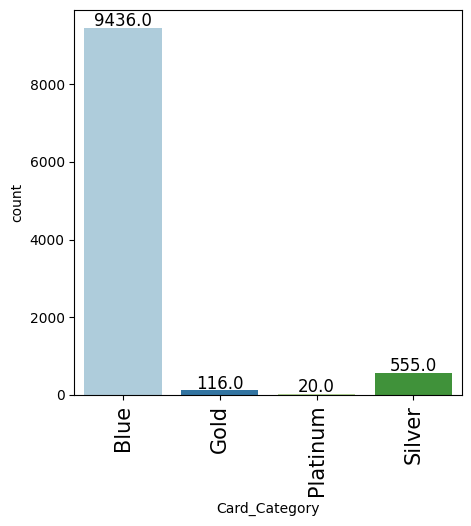

In [51]:
labeled_barplot(data,'Card_Category')

`Attrition_Flag`

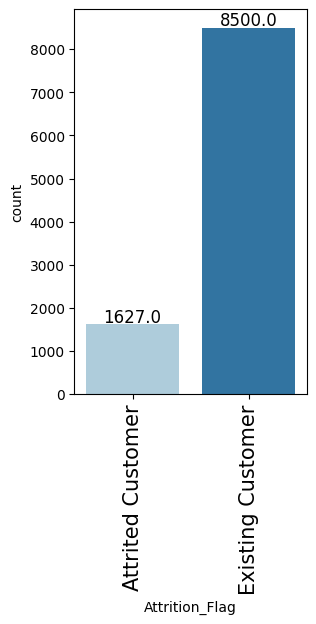

In [52]:
labeled_barplot(data,'Attrition_Flag')

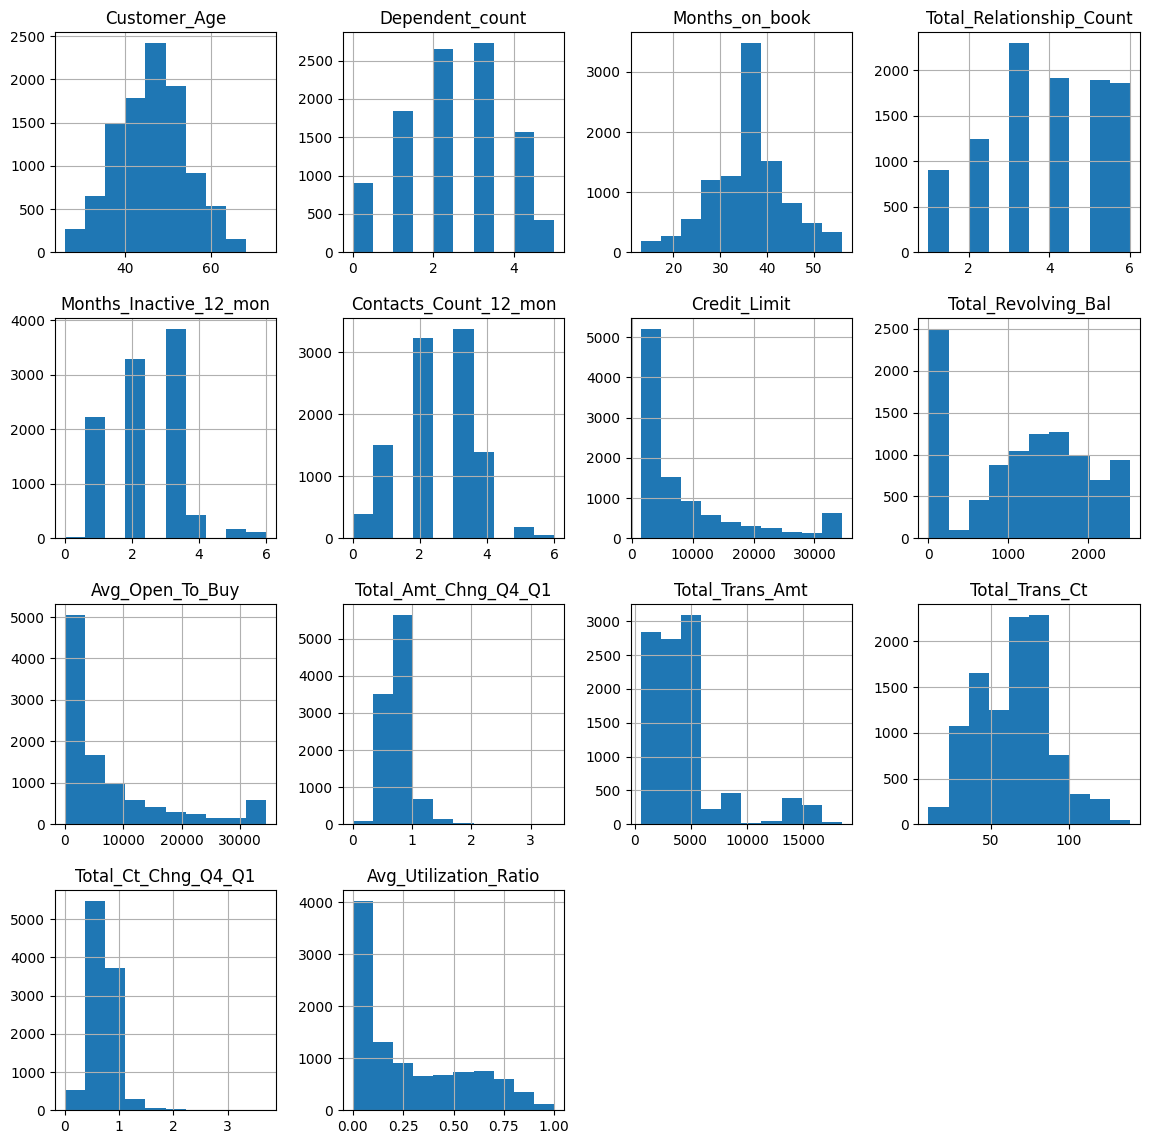

In [53]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

###Feature Engineering

In [54]:
#Converting Attrition Flag into binary
data['Attrition_Flag'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [55]:
data['Attrition_Flag'].unique()

array([0, 1])

**Correlation Check**

* Heatmap does not showcase correlation for categorical data . Let us remove them and study Numerical data with target variable Attrition

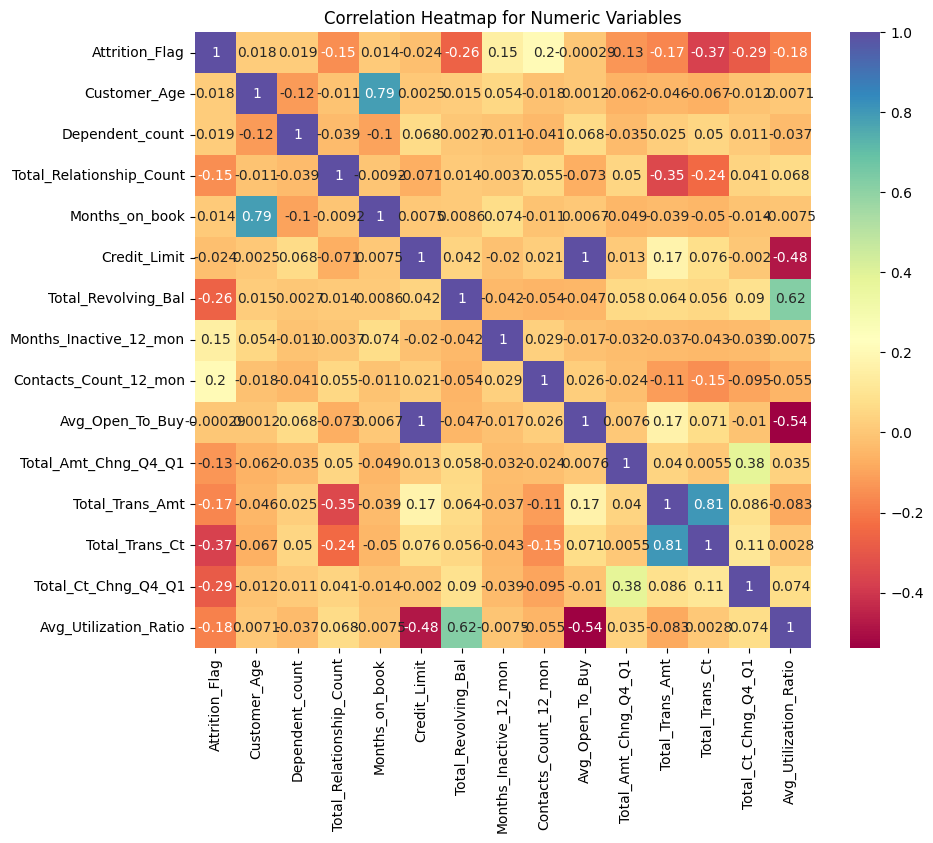

In [56]:
numeric_columns = ['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Total_Relationship_Count',
                   'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Months_Inactive_12_mon',
                   'Contacts_Count_12_mon', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                   'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
numeric_data = data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', square=True)
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()

What are the attributes that have a strong correlation with each other?

Q6) What are the attributes that have a strong correlation with each other?

Credit Limit and Avg_open_to_buy is highly correlated with a value of 1. Amount left on the credit card indicate low usage of Credit Card meaning they have better creditbility with positive correlation. Having a Good credit is directly proportional to having less spending habit/ Credit Card Usage . It is perfectly correlated.

Months on Book and Customer age is highly Positively correlated . Higher the age then higher the months on book as they have built higher period of relationship with the bank.

Total_Trans_Ct and
Total_Ct_Chng_Q4_Q1 are negatively correlated with Attrition Flag

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


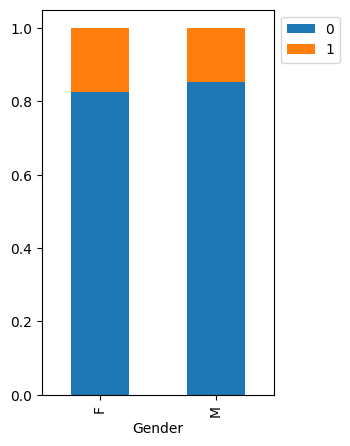

In [57]:
stacked_barplot(data, "Gender", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


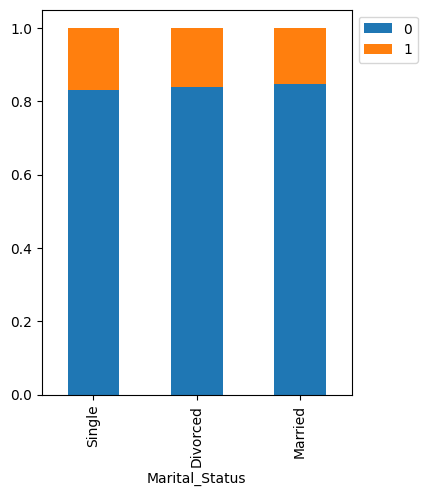

In [58]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

`Attrition_Flag vs Education_Level`

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


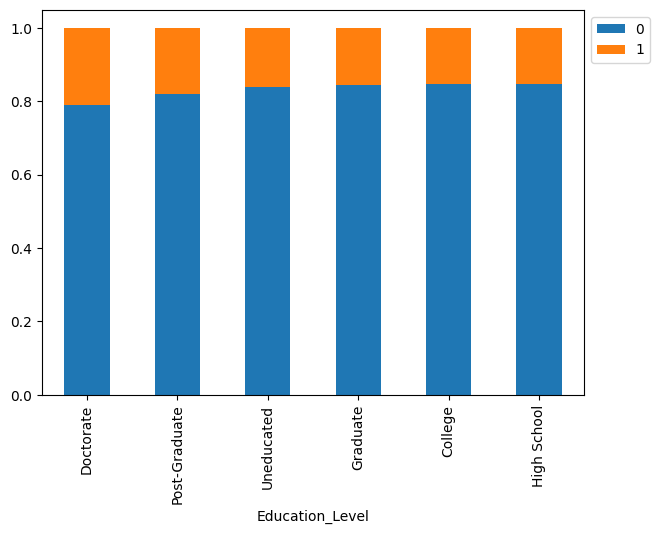

In [59]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

`Attrition_Flag vs Income_Category`

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


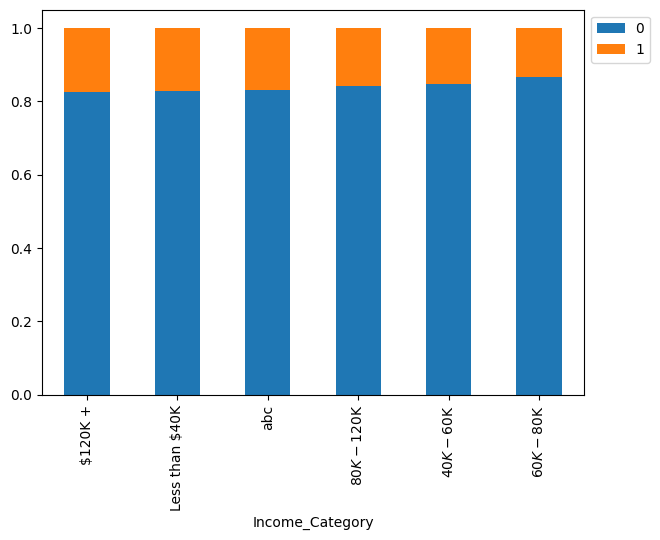

In [60]:
stacked_barplot(data,"Income_Category", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


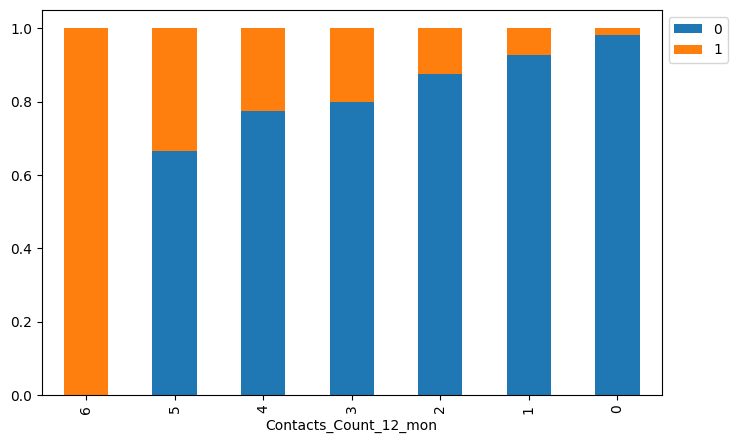

In [61]:
stacked_barplot(data,"Contacts_Count_12_mon", "Attrition_Flag")

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


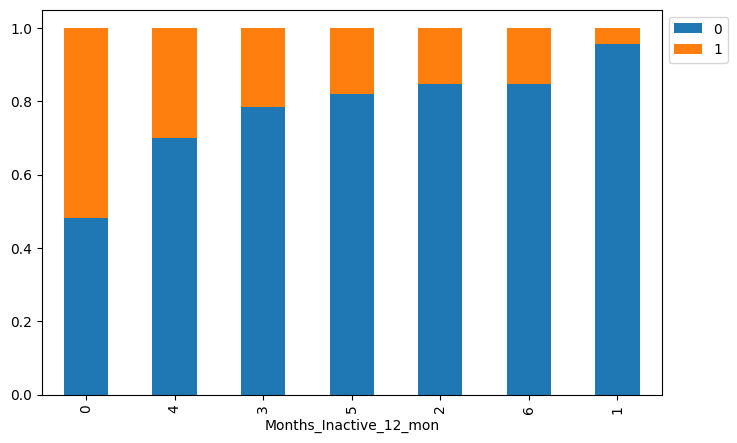

In [62]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag")

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


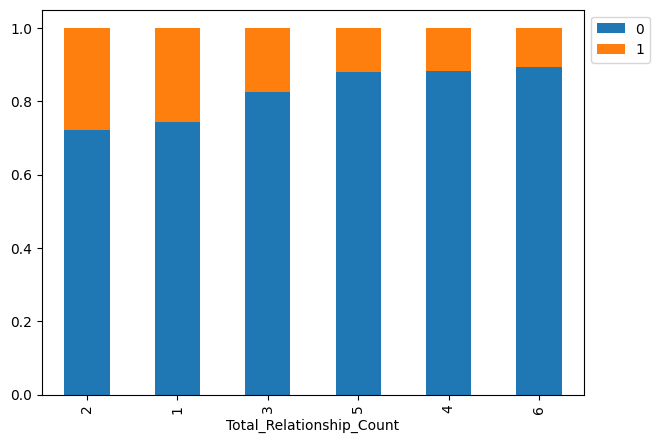

In [63]:
stacked_barplot(data,"Total_Relationship_Count", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

`Attrition_Flag vs Dependent_count`

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


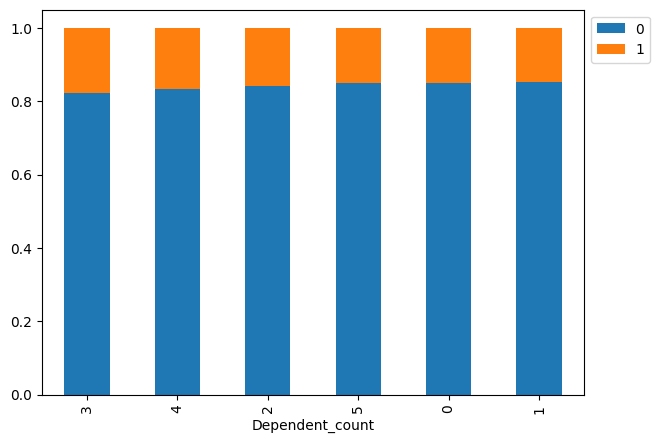

In [64]:
stacked_barplot(data,"Dependent_count", "Attrition_Flag")

`Total_Revolving_Bal` vs `Attrition_Flag`

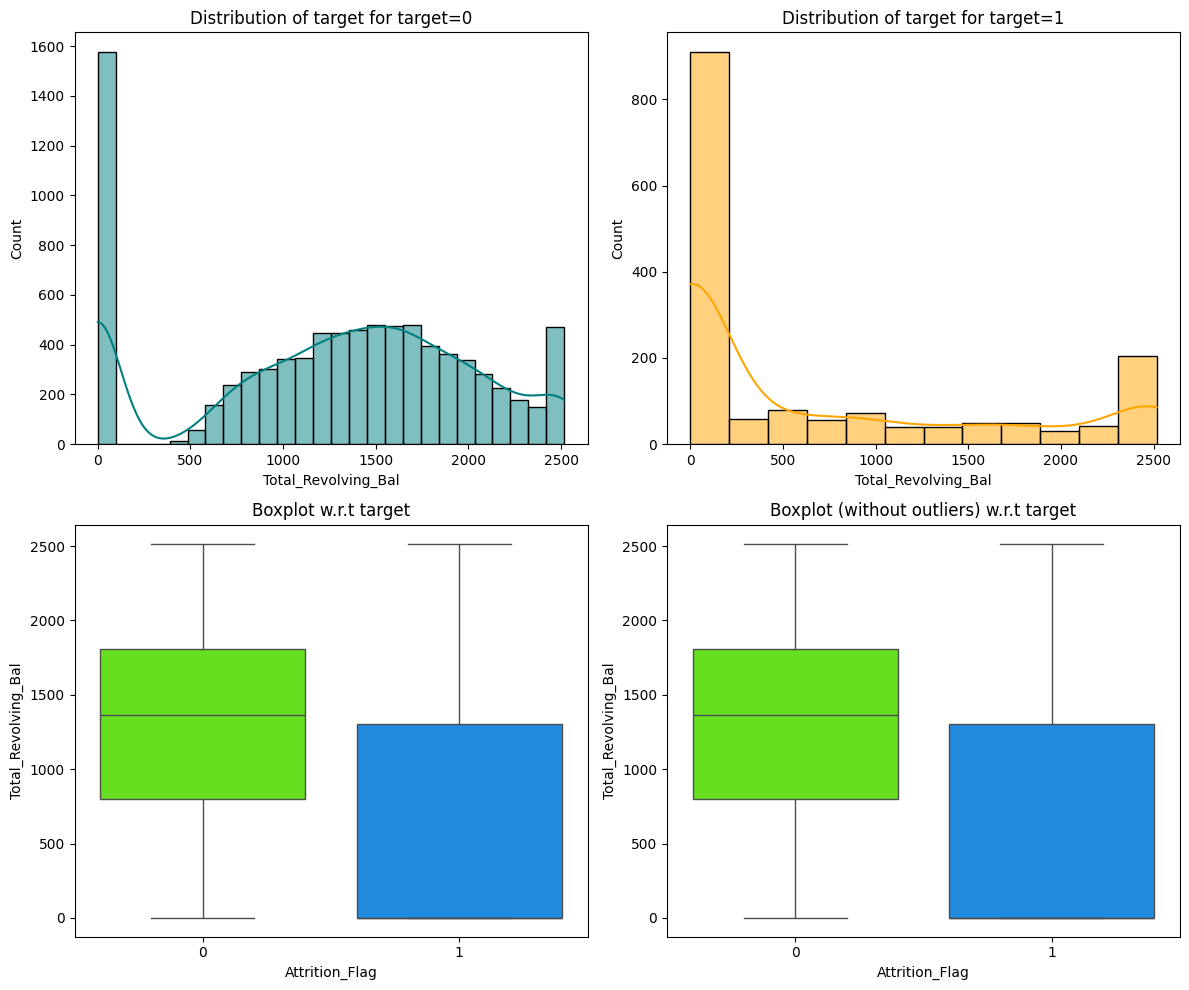

In [65]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

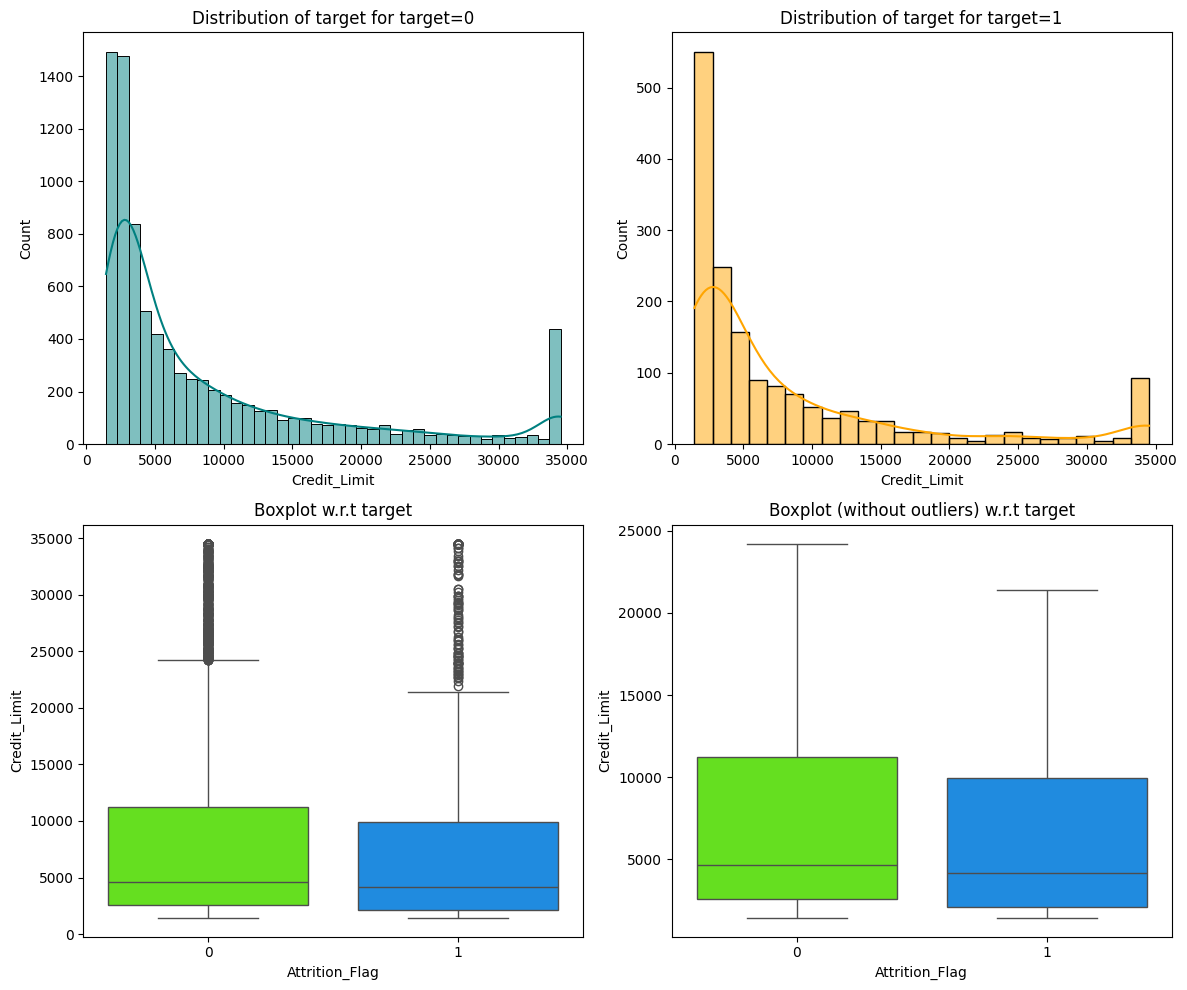

In [66]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

`Attrition_Flag vs Customer_Age`

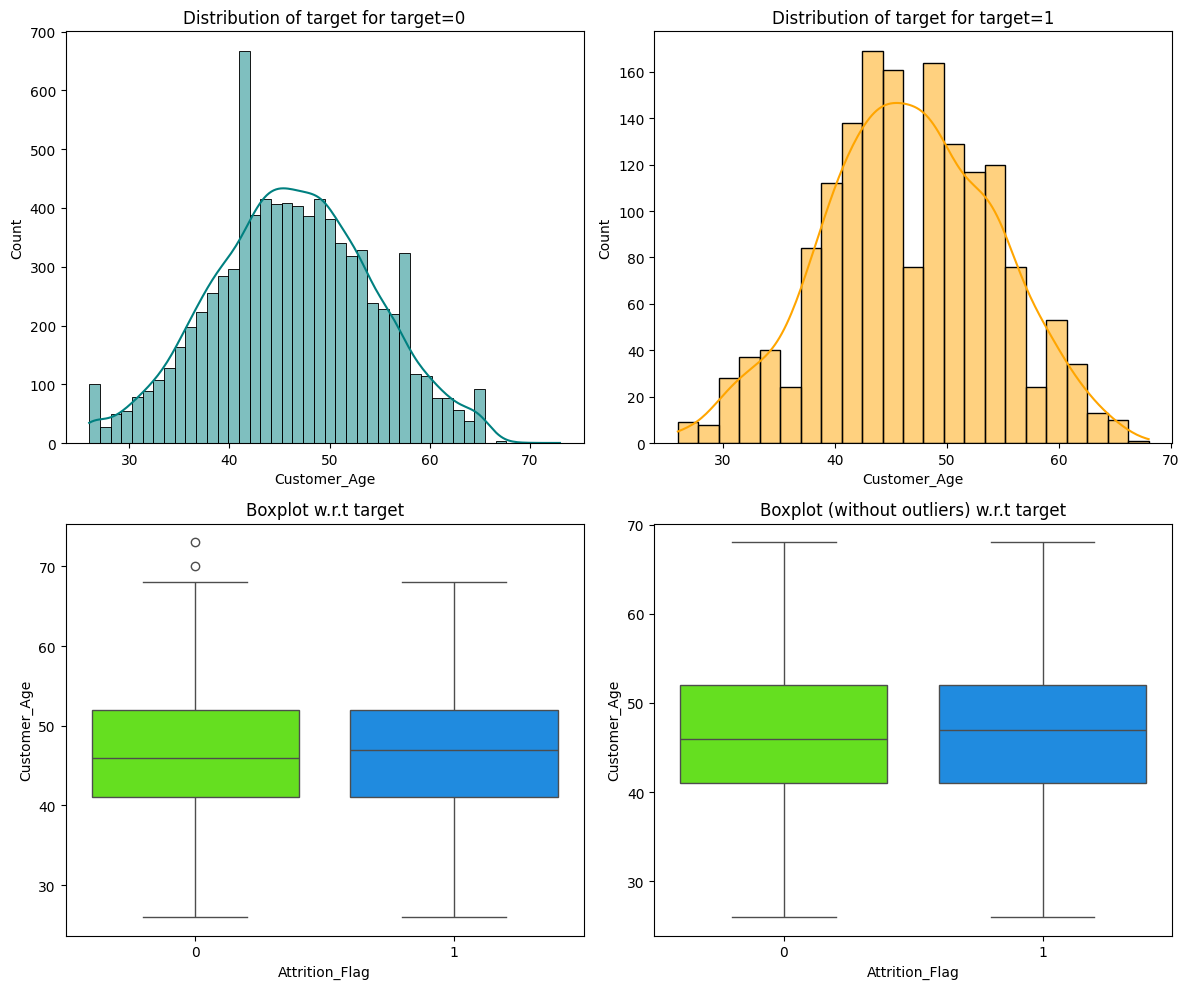

In [67]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

`Total_Trans_Ct` vs `Attrition_Flag`

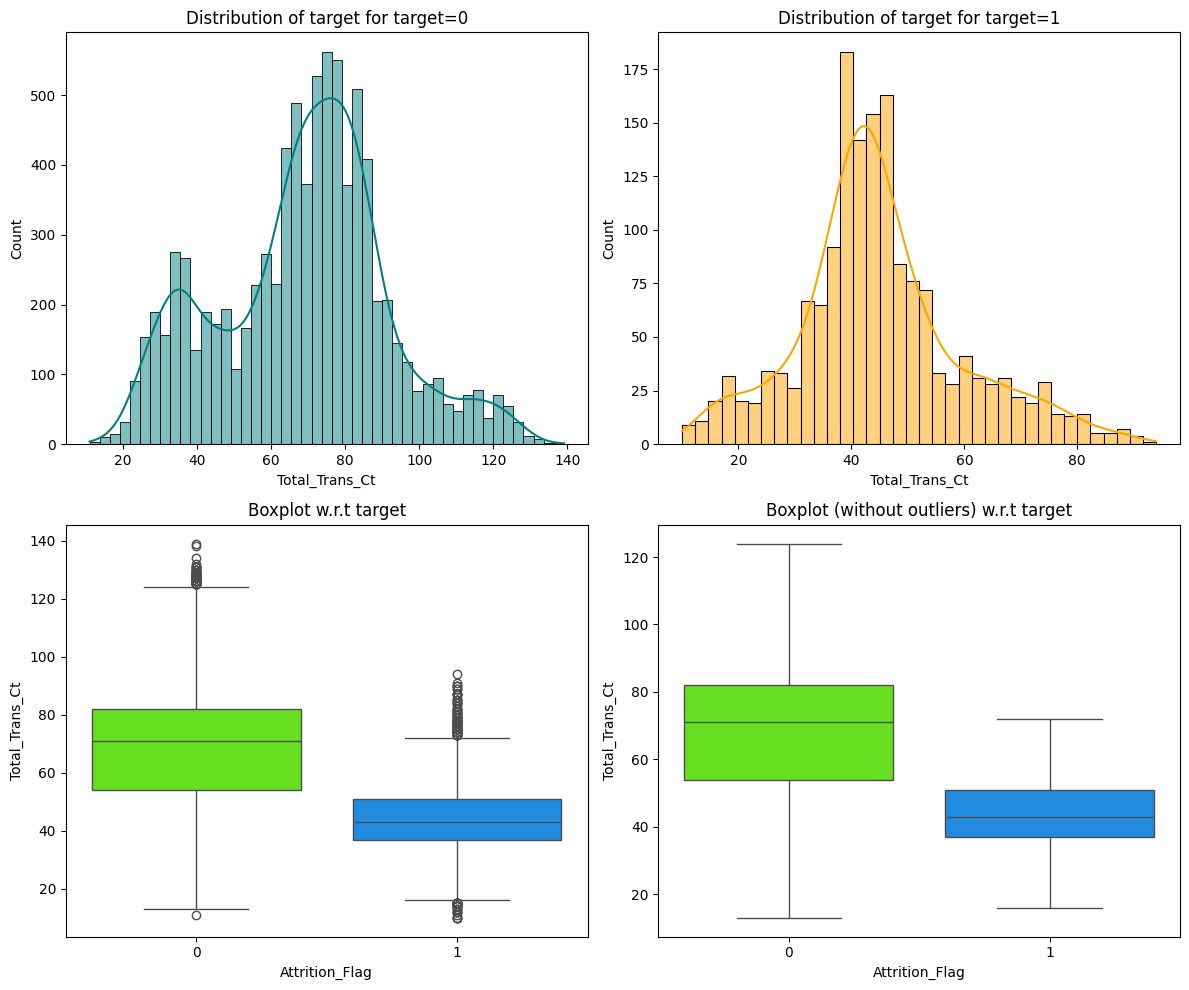

In [68]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

`Total_Trans_Amt` vs `Attrition_Flag`

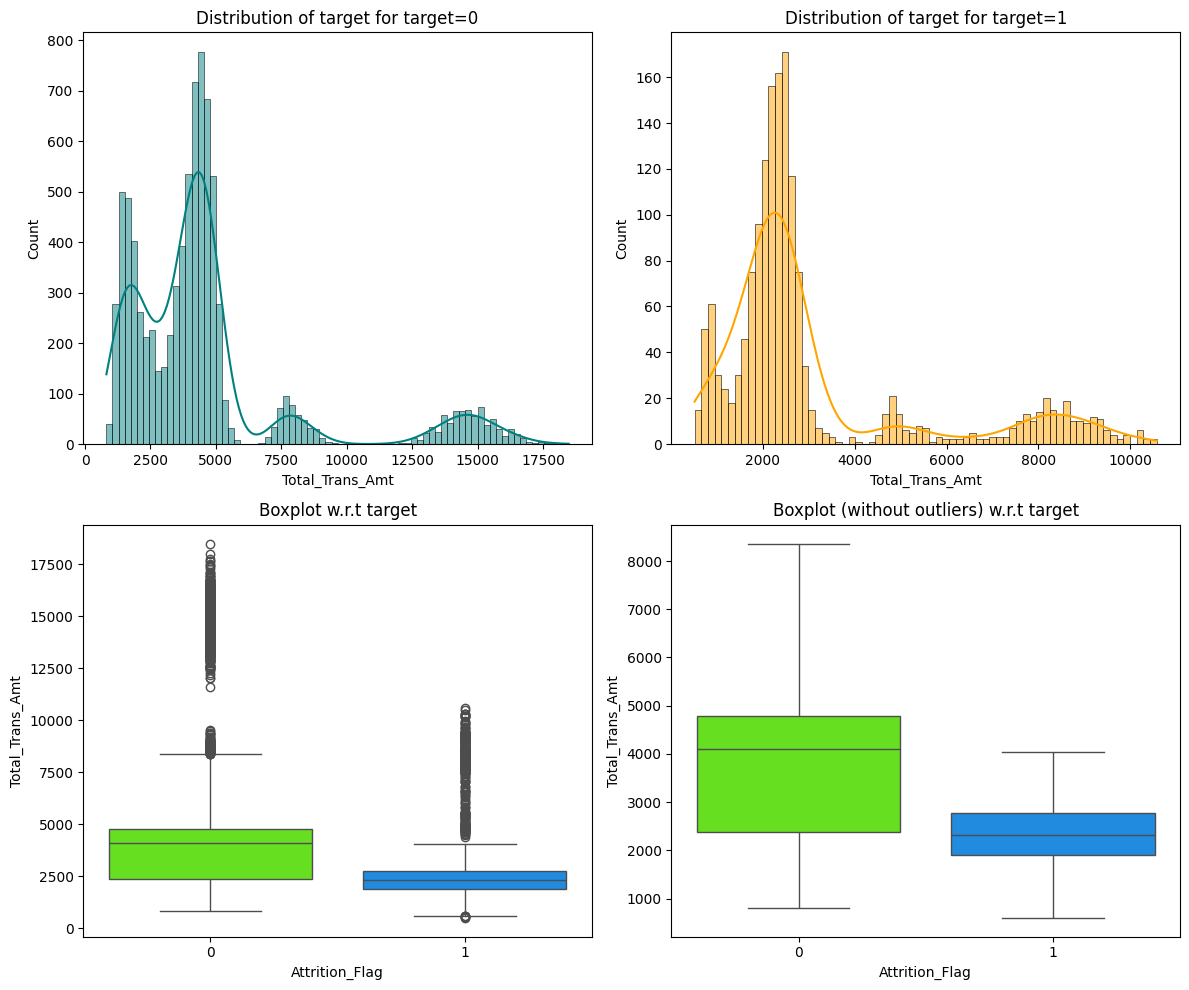

In [69]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

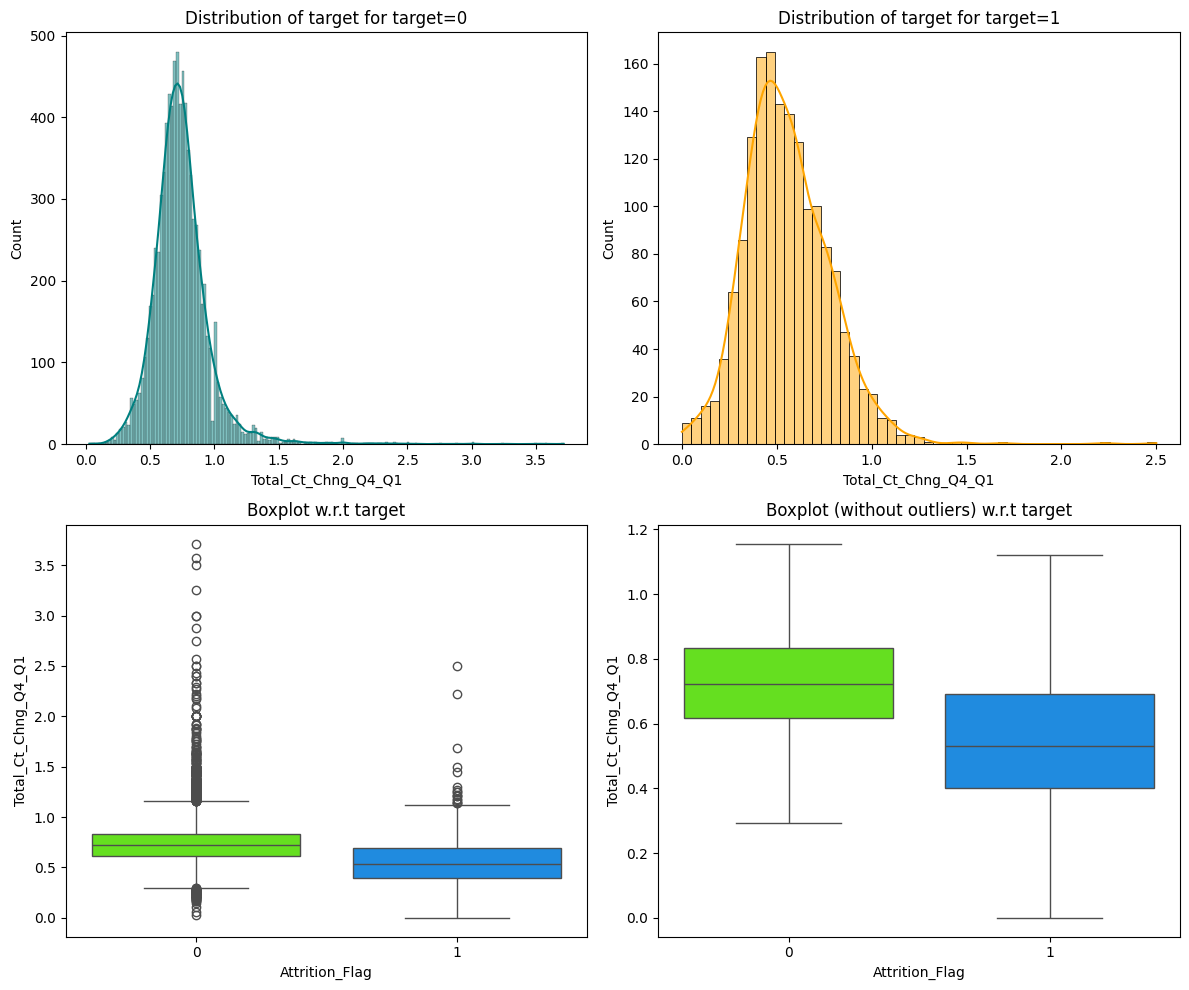

In [70]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

`Avg_Utilization_Ratio` vs `Attrition_Flag`

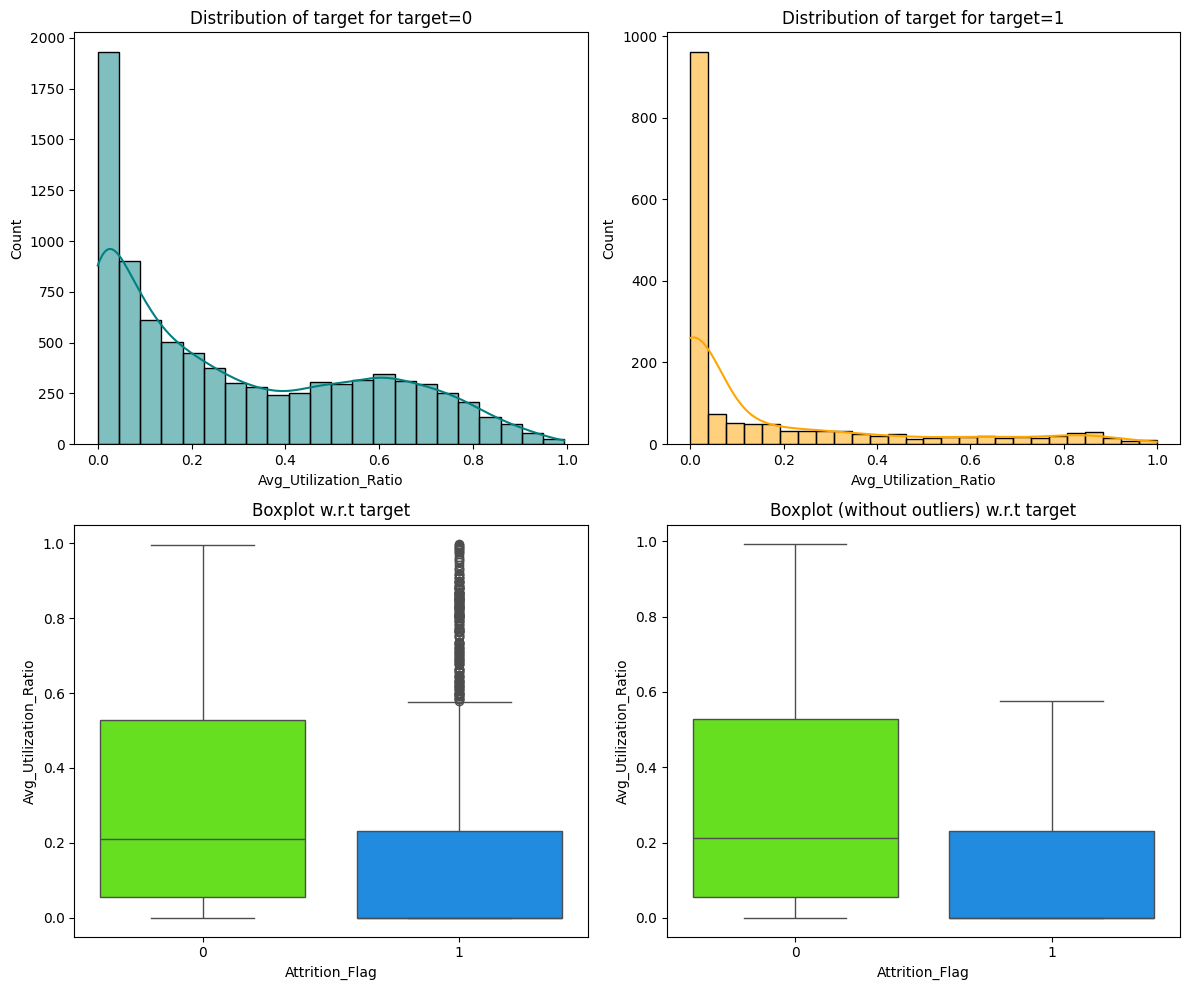

In [71]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")


`Attrition_Flag vs Months_on_book`

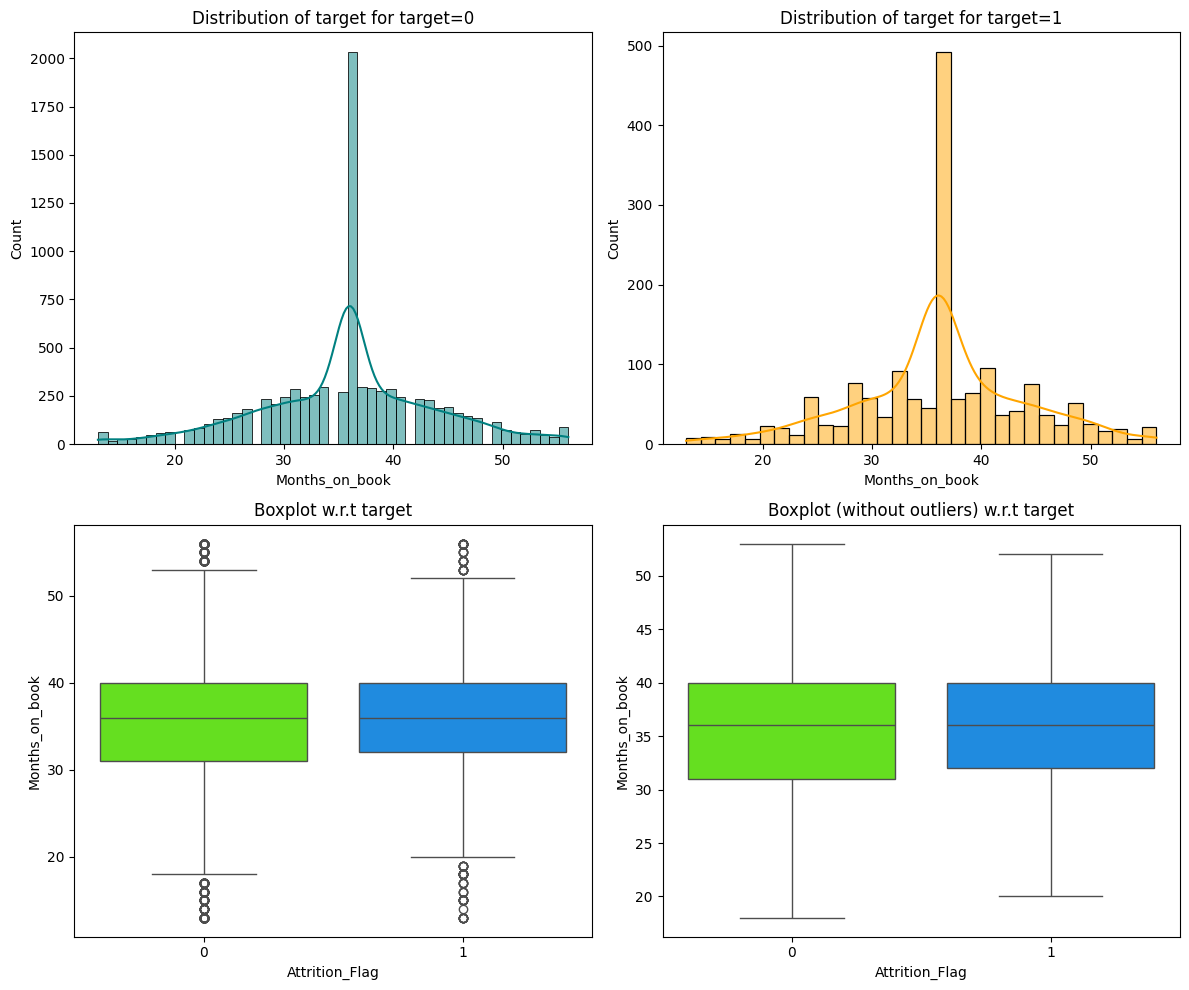

In [72]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

`Attrition_Flag vs Total_Revolving_Bal`

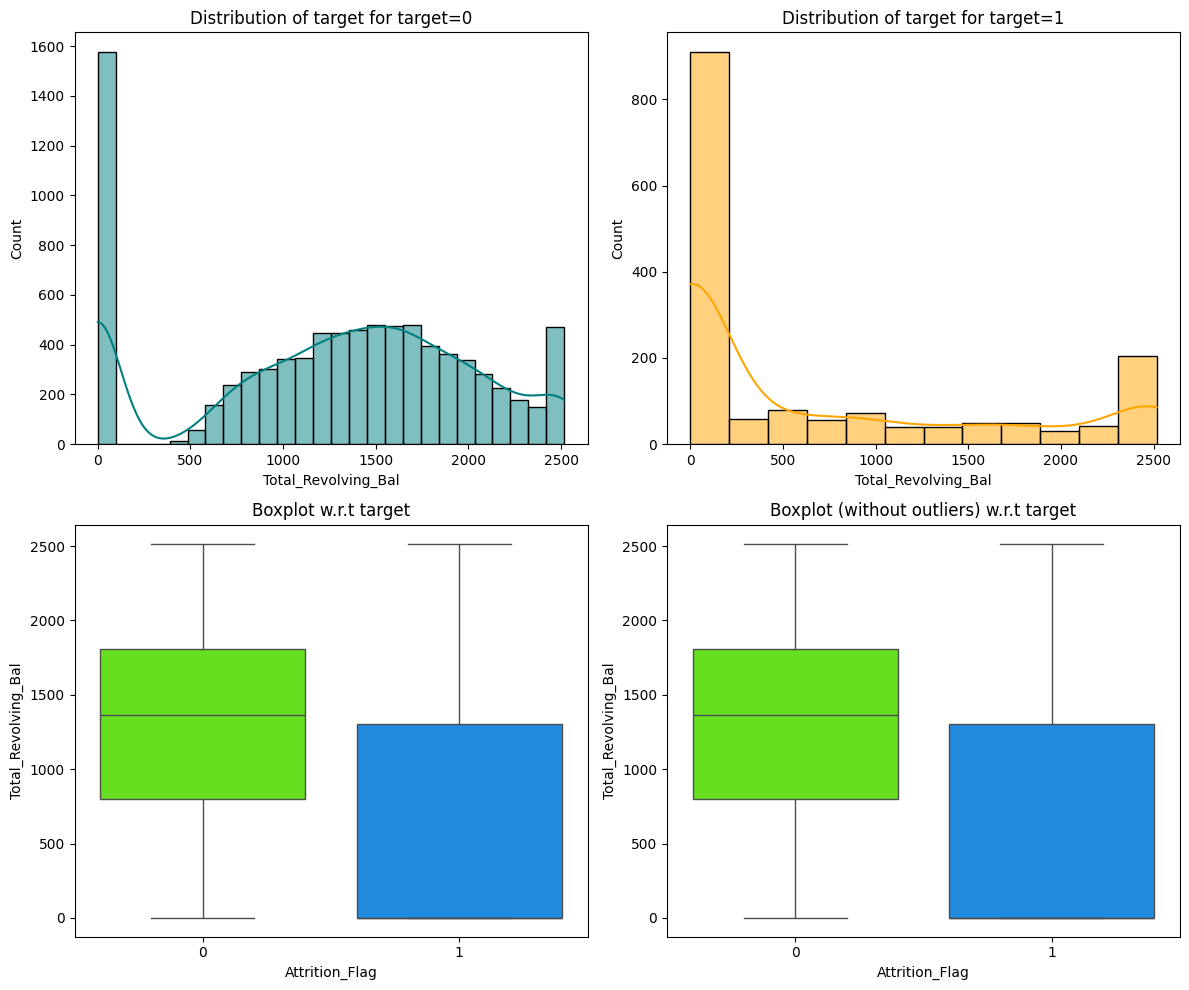

In [73]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Avg_Open_To_Buy`

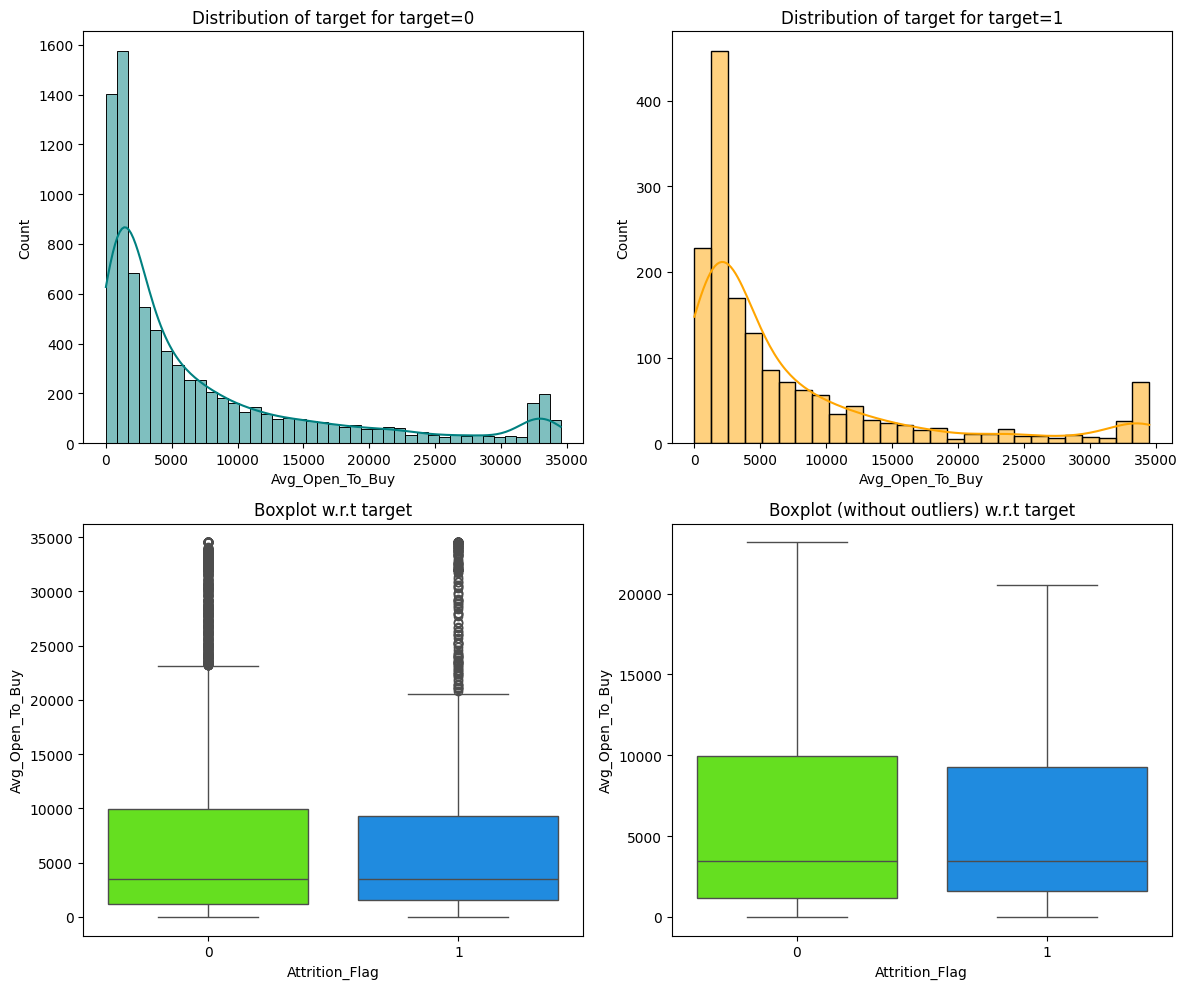

In [74]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

## Data Preprocessing

### Checking for Anomalous Values

####Sanity Checks

In [75]:
#Checking for Null / Missing values
Null_perc = round(100*(data.isnull().sum()/len(data.index)),2)
print(Null_perc)

Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64


15 % of **Education level** and 7 % of **Marital status** seems to have null values

In [76]:
#Checking for unique values
df= data
def check_uniqueness(df):
    for column in df.columns:
        if df[column].nunique() == len(df):
            print(f"{column} has unique values.")
        else:
            print(f"{column} contains duplicate values.")


#'data' is our DataFrame
check_uniqueness(data)

Attrition_Flag contains duplicate values.
Customer_Age contains duplicate values.
Gender contains duplicate values.
Dependent_count contains duplicate values.
Education_Level contains duplicate values.
Marital_Status contains duplicate values.
Income_Category contains duplicate values.
Card_Category contains duplicate values.
Months_on_book contains duplicate values.
Total_Relationship_Count contains duplicate values.
Months_Inactive_12_mon contains duplicate values.
Contacts_Count_12_mon contains duplicate values.
Credit_Limit contains duplicate values.
Total_Revolving_Bal contains duplicate values.
Avg_Open_To_Buy contains duplicate values.
Total_Amt_Chng_Q4_Q1 contains duplicate values.
Total_Trans_Amt contains duplicate values.
Total_Trans_Ct contains duplicate values.
Total_Ct_Chng_Q4_Q1 contains duplicate values.
Avg_Utilization_Ratio contains duplicate values.


## Missing value imputation




**Imputation by Mode** Replaces missing values with the most frequently occurring value
in the column - primarily used for categorical variables



*   Education Level is a categorical variable
*   Marital Status is a categorical variable



In [77]:
# Calculate the mode of the 'Education_Level' column
Mode_Education_Level = data['Education_Level'].mode()[0]
print(Mode_Education_Level)



Graduate


In [78]:
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,1,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


In [79]:
data1 = data.copy()

In [80]:
 #imputation by mode for education level
 data1['Education_Level'].fillna(Mode_Education_Level, inplace=True)



In [81]:
Null_perc = round(100*(data1.isnull().sum()/len(data1.index)),2)
print(Null_perc)

Attrition_Flag             0.000
Customer_Age               0.000
Gender                     0.000
Dependent_count            0.000
Education_Level            0.000
Marital_Status             7.400
Income_Category            0.000
Card_Category              0.000
Months_on_book             0.000
Total_Relationship_Count   0.000
Months_Inactive_12_mon     0.000
Contacts_Count_12_mon      0.000
Credit_Limit               0.000
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            0.000
Total_Amt_Chng_Q4_Q1       0.000
Total_Trans_Amt            0.000
Total_Trans_Ct             0.000
Total_Ct_Chng_Q4_Q1        0.000
Avg_Utilization_Ratio      0.000
dtype: float64


In [82]:
 # Calculate the mode of the 'Marital_Status' column
Mode_Marital_Status = data1['Marital_Status'].mode()[0]
print(Mode_Marital_Status)

data1['Marital_Status'].fillna(Mode_Marital_Status, inplace=True)

Married


In [83]:
data1['Marital_Status'].fillna(Mode_Marital_Status, inplace=True)

In [84]:
Null_perc = round(100*(data1.isnull().sum()/len(data1.index)),2)
print(Null_perc)

Attrition_Flag             0.000
Customer_Age               0.000
Gender                     0.000
Dependent_count            0.000
Education_Level            0.000
Marital_Status             0.000
Income_Category            0.000
Card_Category              0.000
Months_on_book             0.000
Total_Relationship_Count   0.000
Months_Inactive_12_mon     0.000
Contacts_Count_12_mon      0.000
Credit_Limit               0.000
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            0.000
Total_Amt_Chng_Q4_Q1       0.000
Total_Trans_Amt            0.000
Total_Trans_Ct             0.000
Total_Ct_Chng_Q4_Q1        0.000
Avg_Utilization_Ratio      0.000
dtype: float64


In [85]:
data1

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Graduate,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Married,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


Missing values treated

###Need to treat bad values for income category


In [86]:
data1.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'abc'], dtype=object)

But this may Lead to Data Leakage owing to Imputing missing values for the entire data before splitting into training and testing data .

Let's proceed with Splitting the  data for train and test

In [87]:
# outlier detection using boxplot
#numeric_columns = data1.select_dtypes(include=np.number).columns.tolist()
#numeric_columns = data1.select_dtypes(include=np.number).columns.tolist()

# Convert columns to numeric
#for column in numeric_columns:
 #   data1[column] = pd.to_numeric(data1[column], errors='coerce')

#plt.figure(figsize=(15, 12))

#for i, variable in enumerate(numeric_columns):
    #plt.subplot(4, 4, i + 1)
    #plt.boxplot(data[variable], whis=1.5)
    #plt.tight_layout()
    #plt.title(variable)

#plt.show()

In [88]:
df = data1.copy()

In [89]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Graduate,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Married,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Model Building

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* This is done using the `stratify` parameter in the train_test_split function.

In [91]:
X = data.drop(['Attrition_Flag'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['Attrition_Flag'].apply(lambda x : 1 if x=='Yes' else 0)

In [92]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 30) (3039, 30)


In [93]:
y.value_counts(1)

,proportion
Attrition_Flag,
0,1.000


In [94]:
y_test.value_counts(1)

,proportion
Attrition_Flag,
0,1.000


In [95]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [96]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


* After encoding there are 19 columns.

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [98]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Creating Dummy Variables

In [99]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 30) (2026, 30) (2026, 30)


* After encoding there are 30 columns.

###Checking the performance of different models

### Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [100]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [101]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

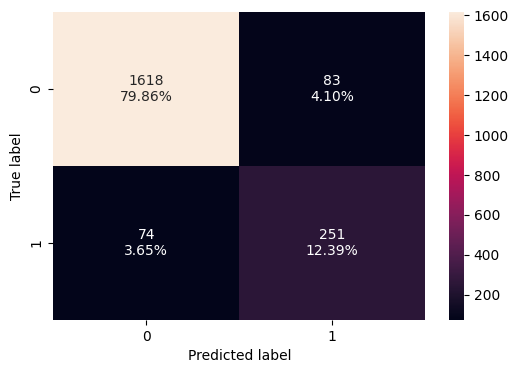

In [102]:
confusion_matrix_sklearn(dtree, X_test, y_test)

**Confusion Matrix -**

* Employee left and the model predicted it correctly that is employee will attrite :  True Positive (observed=1,predicted=1)

* Employee didn't leave and the model predicted employee will attrite : False Positive (observed=0,predicted=1)

* Employee didn't leave and the model predicted employee will not attrite : True Negative (observed=0,predicted=0)

* Employee left and the model predicted that employee won't : False Negative (observed=1,predicted=0)

In [103]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


In [104]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.923   0.772      0.751 0.762


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

### Bagging Classifier

### Random Forest

In [105]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

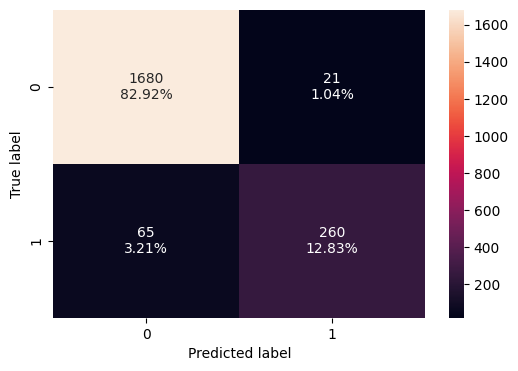

In [106]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [107]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


In [108]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.958   0.800      0.925 0.858


* Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall.

**Random forest with class weights**

In [109]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

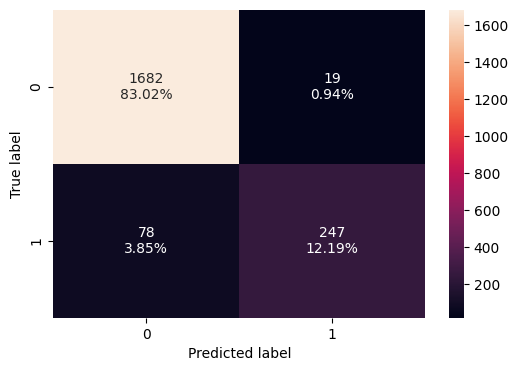

In [110]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [111]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


In [112]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.952   0.760      0.929 0.836


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

### Model Building with original data

Sample code for model building with original data

In [113]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
#'_______' ## Complete the code to append remaining 3 models in the list models
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))



results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = [] # Empty list to store score of the models


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))




Training Performance:

Bagging: 0.985655737704918
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.8067484662576687
Random forest: 0.8128834355828221
GBM: 0.8588957055214724
Adaboost: 0.852760736196319
Xgboost: 0.9079754601226994
dtree: 0.8067484662576687


In [114]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9857, Validation Score: 0.8067, Difference: 0.1789
Random forest: Training Score: 1.0000, Validation Score: 0.8129, Difference: 0.1871
GBM: Training Score: 0.8750, Validation Score: 0.8589, Difference: 0.0161
Adaboost: Training Score: 0.8268, Validation Score: 0.8528, Difference: -0.0259
Xgboost: Training Score: 1.0000, Validation Score: 0.9080, Difference: 0.0920
dtree: Training Score: 1.0000, Validation Score: 0.8067, Difference: 0.1933


GBM appears to give the best performance overall due to its high validation score and minimal difference between training and validation scores, indicating good generalization. AdaBoost is also a strong contender due to its balanced performance.

### Model Building with Oversampled data


In [115]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [116]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 30)
After Oversampling, the shape of train_y: (10198,) 



In [117]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9974504804863699
Random forest: 1.0
GBM: 0.9792116101196313
Adaboost: 0.9645028436948421
dtree: 1.0
Xgboost: 1.0

Validation Performance:

Bagging: 0.8773006134969326
Random forest: 0.8588957055214724
GBM: 0.9079754601226994
Adaboost: 0.8926380368098159
dtree: 0.843558282208589
Xgboost: 0.901840490797546


In [118]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9975, Validation Score: 0.8773, Difference: 0.1201
Random forest: Training Score: 1.0000, Validation Score: 0.8589, Difference: 0.1411
GBM: Training Score: 0.9792, Validation Score: 0.9080, Difference: 0.0712
Adaboost: Training Score: 0.9645, Validation Score: 0.8926, Difference: 0.0719
dtree: Training Score: 1.0000, Validation Score: 0.8436, Difference: 0.1564
Xgboost: Training Score: 1.0000, Validation Score: 0.9018, Difference: 0.0982




GBM appears to give the best performance overall due to its high validation score and minimal difference between training and validation scores, indicating good generalization. AdaBoost is also a strong contender due to its balanced performance. XGBoost performs well but shows some signs of overfitting.



### Model Building with Undersampled data

In [119]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [120]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 30)
After Under Sampling, the shape of train_y: (1952,) 



In [121]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9795081967213115
Adaboost: 0.9528688524590164
dtree: 1.0
Xgboost: 1.0

Validation Performance:

Bagging: 0.9171779141104295
Random forest: 0.9263803680981595
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
dtree: 0.8957055214723927
Xgboost: 0.9601226993865031


In [122]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9908, Validation Score: 0.9172, Difference: 0.0736
Random forest: Training Score: 1.0000, Validation Score: 0.9264, Difference: 0.0736
GBM: Training Score: 0.9795, Validation Score: 0.9571, Difference: 0.0225
Adaboost: Training Score: 0.9529, Validation Score: 0.9601, Difference: -0.0073
dtree: Training Score: 1.0000, Validation Score: 0.8957, Difference: 0.1043
Xgboost: Training Score: 1.0000, Validation Score: 0.9601, Difference: 0.0399


AdaBoost appears to give the best performance overall due to its high validation score and minimal difference between training and validation scores, indicating excellent generalization. GBM is also a strong contender due to its balanced performance. XGBoost performs well but shows some signs of overfitting.

**AdaBoost, GBM, and XGBoost** models trained on the given dataset exhibit strong performance on both the training and validation datasets, indicating good generalization and robustness.

**Bagging and Random Forest** models also perform well but show signs of overfitting, as indicated by the larger differences between training and validation scores.

**Decision Tree** shows the largest difference, indicating significant overfitting.

# 3 Models of choice with ranking

RANK 1) Adaboost

RANK 2) GBM

RANK 3) XGBoost

We will now tune the best 3 models obtained above using randomized search and metric of interest

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuning AdaBoost using original data

In [123]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8350340136054422:
CPU times: user 4.32 s, sys: 324 ms, total: 4.64 s
Wall time: 2min 4s


In [124]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth= 3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_adb.fit(X_train,y_train) ## Complete the code to fit the model on original data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [125]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
adb1_train

,Accuracy,Recall,Precision,F1
0,0.982,0.927,0.961,0.944


In [126]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.968,0.862,0.934,0.896


#### Tuning AdaBoost using undersampled data

In [127]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9467451596023025:
CPU times: user 2 s, sys: 105 ms, total: 2.11 s
Wall time: 52.6 s


In [128]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.05, base_estimator= DecisionTreeClassifier(max_depth= 3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_adb.fit(X_train_un,y_train_un) ## Complete the code to fit the model on original data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [129]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.973,0.978,0.968,0.973


In [130]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.938,0.966,0.734,0.834


#### Tuning AdaBoost using Oversampled data

In [131]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.94764436490985:
CPU times: user 5.91 s, sys: 404 ms, total: 6.31 s
Wall time: 3min 21s


In [132]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.05, base_estimator= DecisionTreeClassifier(max_depth= 3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_adb.fit(X_train_un,y_train_un) ## Complete the code to fit the model on original data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [133]:
# Checking model's performance on training set
adb3_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb3_train

,Accuracy,Recall,Precision,F1
0,0.973,0.978,0.968,0.973


In [134]:
# Checking model's performance on validation set
adb3_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb3_val

,Accuracy,Recall,Precision,F1
0,0.938,0.966,0.734,0.834


#### Tuning Gradient Boosting using original data

In [135]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8022187336473051:
CPU times: user 5.18 s, sys: 442 ms, total: 5.62 s
Wall time: 3min


In [136]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [137]:
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train) ## Complete the code to check the performance on undersampled train set
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.974,0.874,0.958,0.914


In [138]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.968,0.853,0.946,0.897


#### Tuning Gradient Boosting using undersampled data

In [139]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9518576661433805:
CPU times: user 2.9 s, sys: 195 ms, total: 3.09 s
Wall time: 1min 22s


In [140]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [141]:
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_un, y_train_un) ## Complete the code to check the performance on undersampled train set
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.978,0.985,0.973,0.979


In [142]:
gbm2_val =model_performance_classification_sklearn(tuned_gbm2, X_val, y_val) ## Complete the code to check the performance on validation set
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.940,0.957,0.743,0.836


#### Tuning Gradient Boosting using oversampled data

In [143]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9523506321076025:
CPU times: user 6.81 s, sys: 715 ms, total: 7.52 s
Wall time: 4min 57s


In [144]:
# Creating new pipeline with best parameters
tuned_gbm3 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm3.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [145]:
gbm3_train = model_performance_classification_sklearn(tuned_gbm3, X_train_over, y_train_over) ## Complete the code to check the performance on undersampled train set
gbm3_train

,Accuracy,Recall,Precision,F1
0,0.975,0.980,0.971,0.975


In [146]:
gbm3_val =model_performance_classification_sklearn(tuned_gbm3, X_val, y_val) ## Complete the code to check the performance on validation set
gbm3_val

,Accuracy,Recall,Precision,F1
0,0.957,0.911,0.834,0.871


#### Tuning XGBoost Model with Original data

In [147]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }


from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9180272108843537:
CPU times: user 2.37 s, sys: 240 ms, total: 2.61 s
Wall time: 1min 7s


In [148]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.05,
    gamma=3,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [149]:
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train) ## Complete the code to check the performance on original train set
xgb_train

,Accuracy,Recall,Precision,F1
0,0.980,0.999,0.892,0.942


In [150]:
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)  ## Complete the code to check the performance on validation set
xgb_val

,Accuracy,Recall,Precision,F1
0,0.959,0.942,0.827,0.881


## Model Comparison and Final Model Selection

### Comparing all the models

In [151]:
# training performance comparison

# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        gbm3_train.T,
        adb1_train.T,
        adb2_train.T,
        adb3_train.T,
        xgb_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
    "XGBoost trained with Original data"
]
print("Training performance comparison:")
models_train_comp_df



Training performance comparison:


,Gradient boosting trained with Original data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data,XGBoost trained with Original data
Accuracy,0.974,0.978,0.975,0.982,0.973,0.973,0.980
Recall,0.874,0.985,0.980,0.927,0.978,0.978,0.999
Precision,0.958,0.973,0.971,0.961,0.968,0.968,0.892
F1,0.914,0.979,0.975,0.944,0.973,0.973,0.942


In [152]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [  gbm1_val.T,
        gbm2_val.T,
        gbm3_val.T,
        adb1_val.T,
        adb2_val.T,
        adb3_val.T,
        xgb_val.T], axis=1,
)
models_val_comp_df.columns = [
      "Gradient boosting validation with Original data",
    "Gradient boosting validation with Undersampled data",
    "Gradient boosting validation with Oversampled data",
    "AdaBoost validation with Original data",
    "AdaBoost validation with Undersampled data",
    "AdaBoost validation with Oversampled data",
    "XGBoost validation with Original data"
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient boosting validation with Original data,Gradient boosting validation with Undersampled data,Gradient boosting validation with Oversampled data,AdaBoost validation with Original data,AdaBoost validation with Undersampled data,AdaBoost validation with Oversampled data,XGBoost validation with Original data
Accuracy,0.968,0.940,0.957,0.968,0.938,0.938,0.959
Recall,0.853,0.957,0.911,0.862,0.966,0.966,0.942
Precision,0.946,0.743,0.834,0.934,0.734,0.734,0.827
F1,0.897,0.836,0.871,0.896,0.834,0.834,0.881


Given these observations, AdaBoost with Original Data and Gradient Boosting with Original Data are the best-performing models, with XGBoost with Original Data also being a strong contender

### Feature importance

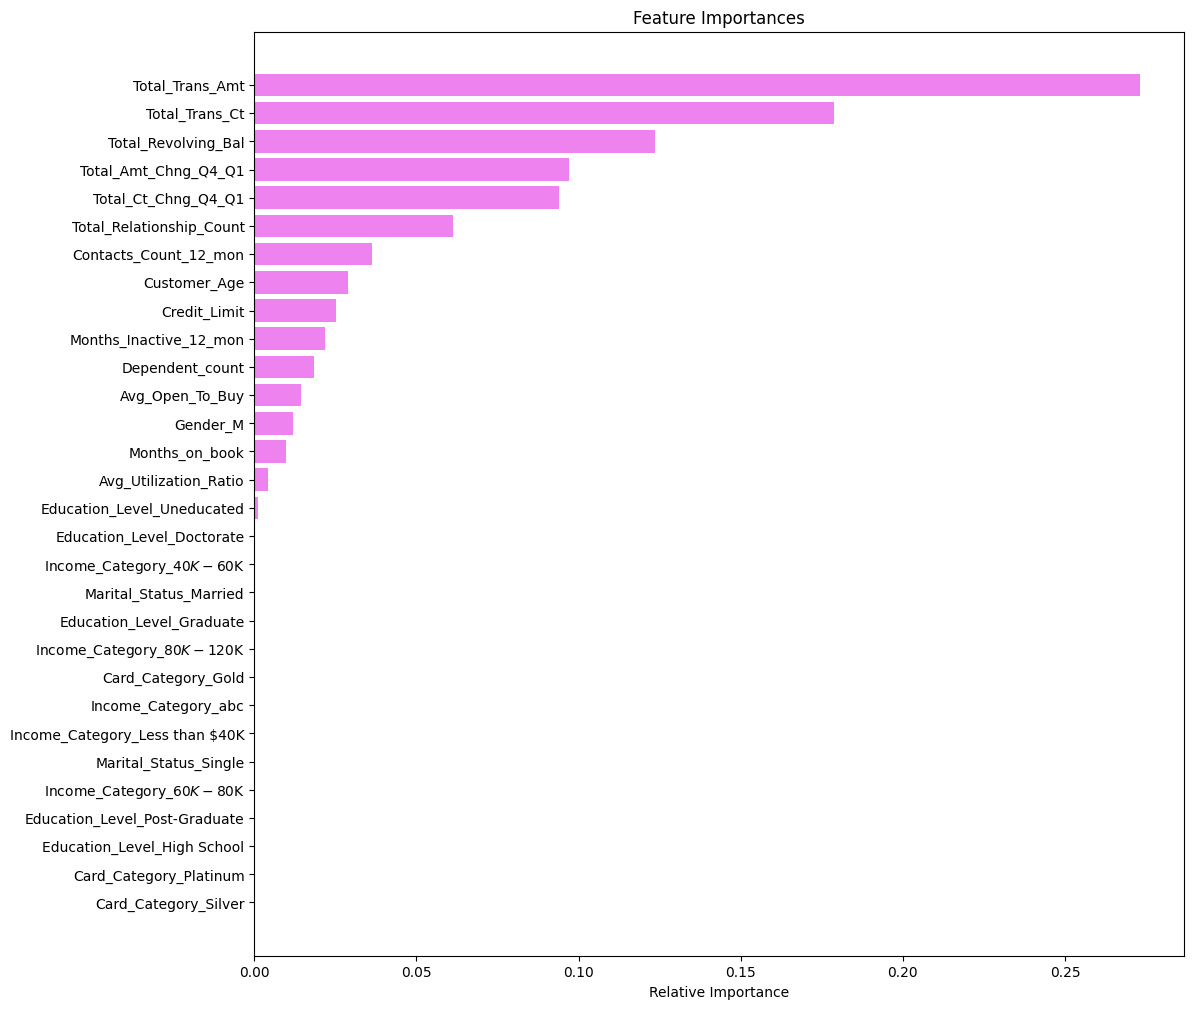

In [153]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature.
#It is also known as the Gini importance )

feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Test set final performance

In [154]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.936,0.969,0.726,0.830


The Adaboost model trained on undersampled data has given ~96% recall on the test set
This performance is in line with what we achieved with this model on the train and validation sets
So, this is a generalized model

* AdaBoost with Original Data and Gradient Boosting with Original Data both show excellent performance with high accuracy, precision, and F1 scores, indicating good generalization and balance between precision and recall.
* XGBoost with Original Data also performs well, with high recall and a strong F1 score.
AdaBoost and Gradient Boosting with Undersampled Data show high recall but lower precision, indicating they are better at identifying true positives but at the cost of more false positives.
* AdaBoost and Gradient Boosting with Oversampled Data show a good balance but slightly lower performance compared to the models trained with original data.

### Feature importance on test data

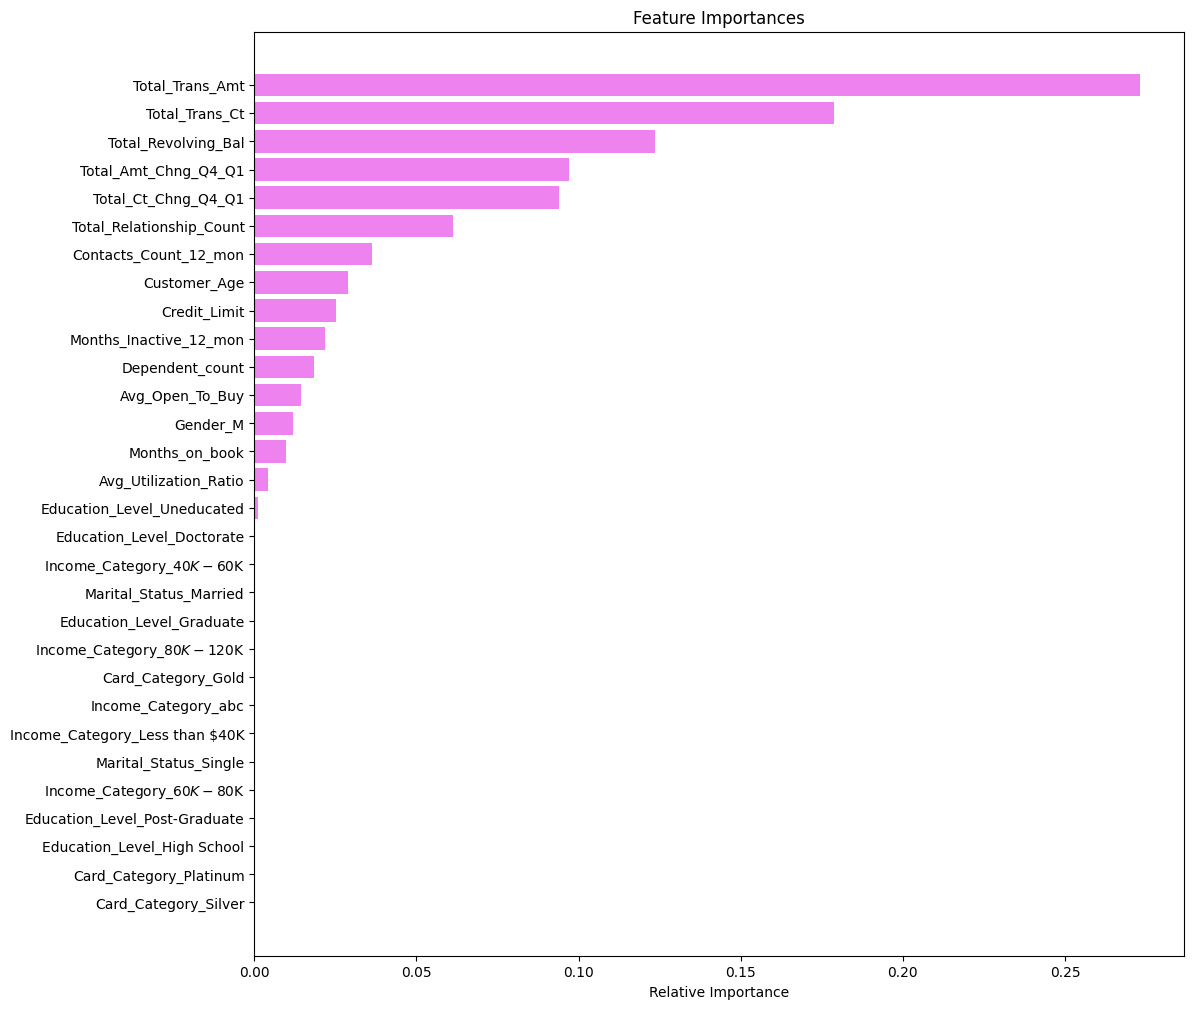

In [155]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature.
#It is also known as the Gini importance )

feature_names = X_test.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that Total_Trans_Amt: Total Transaction Amount (Last 12 months) and
Total_Trans_Ct: Total Transaction Count (Last 12 months) , Total_Revolving_Bal are the most important features for making predictions

# Business Insights and Conclusions

**Questions**:

1. How is the total transaction amount distributed?

Total Transaction amount is right skewed
Median is closer to 5000

Too many outliers

Total_Trans_Amt: The average transaction amount is about 4,404 USD, with a standard deviation of 3,397 USD. The range is from 510 USD to 18,484 USD.

2. What is the distribution of the level of education of customers?
Is Normally distribution

There are few outliers. Highest percentage 30.9% of customers are Graduates. Smaller percentage 4.5% are Doctorate

3. What is the distribution of the level of income of customers?
35 percent of customers has a income lesser than 40K USD

There are bad values stored for income . This will need treatment. As Anamalous values are  11% . We can choose to drop those records or choose imputation by mode as these are categorical . We will need to consult Business stakeholders in a real world scenario, alternately ask for better data collection .

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

**Attrited Customer:**
Count: 1627 customers.

Mean: The average change in transaction count is 0.554.

Std: The standard deviation is 0.227, indicating moderate variability.

Min: The minimum change is 0.

25%: 25% of the customers have a change of 0.400 or less.

50% (Median): The median change is 0.531.

75%: 75% of the customers have a change of 0.692 or less.

Max: The maximum change is 2.500.


**Existing Customer:**
Count: 8500 customers.

Mean: The average change in transaction count is 0.742.

Std: The standard deviation is 0.228, indicating moderate variability.

Min: The minimum change is 0.028.

25%: 25% of the customers have a change of 0.617 or less.

50% (Median): The median change is 0.721.

75%: 75% of the customers have a change of 0.833 or less.

Max: The maximum change is 3.714.


**Summary:**
Existing Customers tend to have a higher average change in transaction count between Q4 and Q1 compared to Attrited Customers.
The variability (standard deviation) is similar for both groups.
The range of changes (from min to max) is wider for Existing Customers, indicating more variability in their transaction count changes.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
**Attrited Customer:**
Count: 1627 customers.

Mean: The average change in transaction count is 2.693.

Std: The standard deviation is 0.900, indicating moderate variability.

Min: The minimum change is 0.

25%: 25% of the customers have a change of 2.000 or less.

50% (Median): The median change is 3.000.

75%: 75% of the customers have a change of 3.000 or less.

Max: The maximum change is 6.


Existing Customer:
Count: 8500 customers.

Mean: The average change in transaction count is 2.274.

Std: The standard deviation is 1.017, indicating moderate variability.

Min: The minimum change is 0.

25%: 25% of the customers have a change of 1.000 or less.

50% (Median): The median change is 2.

75%: 75% of the customers have a change of 3.000 or less.

Max: The maximum change is 6.

**Summary:**
Attrited Customers tend to have a higher average change in transaction count between Q4 and Q1 compared to Existing Customers.
The variability (standard deviation) is slightly higher for Existing Customers.
The range of changes (from min to max) is the same for both groups, indicating that both groups have similar extremes in their transaction count changes


6. What are the attributes that have a strong correlation with each other?

Credit Limit and Avg_open_to_buy is highly correlated with a value of 1. Amount left on the credit card indicate low usage of Credit Card meaning they have better creditbility with positive correlation. Having a Good credit is directly proportional to having less spending habit/ Credit Card Usage . It is perfectly correlated.

Months on Book and Customer age is highly Positively correlated . Higher the age then higher the months on book as they have built higher period of relationship with the bank.

Total_Trans_Ct and
Total_Ct_Chng_Q4_Q1 are negatively correlated with Attrition Flag


**Conclusions**
•	The transaction amount data indicates a need for robust outlier management to ensure accurate analysis and insights.

•	The education level distribution suggests opportunities for targeted marketing and engagement strategies.

•	Income data quality issues highlight the importance of accurate data collection and cleaning processes.

•	The analysis of transaction count changes by account status underscores the importance of personalized retention strategies for existing customers.



### Business Recommendations ####

1. **Address Outliers in Transaction Amounts**:
   - Implement strategies to handle outliers, such as capping extreme values or using robust statistical methods.
   - Segment customers based on transaction amounts to tailor marketing and service strategies.

2. **Leverage Education Data for Targeted Marketing**:
   - Utilize the high percentage of graduates to design educational and professional development programs.
   - Develop specialized campaigns for customers with higher education levels, such as doctorate holders, to increase engagement.

3. **Income Data Quality Improvement**:
   - Clean the income data by addressing bad values through imputation or removal.
   - Collaborate with stakeholders to improve data collection methods for more accurate and reliable income data.

4. **Enhance Customer Retention Strategies**:
   - Focus on existing customers who show higher variability in transaction counts to increase engagement.
   - Develop personalized retention strategies based on transaction behavior changes between quarters.


***